In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [72]:
from notebook_utils import *
from generate_embedding import *
from sklearn.manifold import TSNE
import re

In [8]:
ppty_vector_train = pd.read_csv("ten_genes/train/ge_pln/property_vector_beforekpca_p=1,T=2_notnormalized_2021-03-18.csv", sep="\t")

In [9]:
ppty_vector_train.head()

,patient_ID,0,1,2,3,4,5,6,7,8,...,743,744,745,746,747,748,749,750,751,752
0,249600,0.000365,0.000677,0.000069,0.000225,0.000046,0.000557,0.000000,0.000000,0.000000,...,0.000000,0.000665,0.000221,0.000119,0.000811,0.000689,0.000000,0.000067,0.000000,0.000000
1,441891,0.000000,0.000000,0.000060,0.000217,0.000000,0.000000,0.000152,0.000000,0.000000,...,0.000000,0.000000,0.000213,0.000000,0.000000,0.000663,0.000000,0.000000,0.000000,0.000000
2,22476,0.000273,0.000653,0.000088,0.000184,0.000005,0.000537,0.000194,0.000618,0.000241,...,0.000191,0.000598,0.000000,0.000100,0.000783,0.000000,0.000481,0.000061,0.000626,0.000000
3,249532,0.000000,0.000696,0.000127,0.000327,0.000050,0.000573,0.000201,0.000722,0.000282,...,0.000223,0.000000,0.000000,0.000067,0.000835,0.000000,0.000562,0.000000,0.000731,0.000416
4,305173,0.000407,0.000571,0.000102,0.000000,0.000043,0.000470,0.000193,0.000656,0.000256,...,0.000203,0.000580,0.000000,0.000000,0.000685,0.000000,0.000511,0.000059,0.000665,0.000000


In [13]:
ppty_vector_test = pd.read_csv("ten_genes/test/ge_pln/property_vector_beforekpca_p=1,T=2_notnormalized_2021-03-18.csv", sep="\t")

In [14]:
ppty_vector_test.head()

,patient_ID,0,1,2,3,4,5,6,7,8,...,743,744,745,746,747,748,749,750,751,752
0,441736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000129,...,0.000077,0.000566,0.000000,0.00000,0.000000,0.000000,0.000193,0.000057,0.000252,0.000000
1,249665,0.000000,0.000000,0.000301,0.000211,0.000027,0.000000,0.000078,0.000000,0.000137,...,0.000082,0.000573,0.000220,0.00000,0.000000,0.000687,0.000205,0.000058,0.000267,0.000000
2,305252,0.000415,0.000596,0.000369,0.000295,0.000071,0.000491,0.000183,0.000000,0.000230,...,0.000137,0.000000,0.000222,0.00006,0.000713,0.000691,0.000344,0.000000,0.000448,0.000000
3,305153,0.000386,0.000596,0.000089,0.000000,0.000073,0.000491,0.000198,0.000244,0.000326,...,0.000194,0.000000,0.000000,0.00000,0.000713,0.000000,0.000488,0.000000,0.000634,0.000372
4,305171,0.000000,0.000596,0.000053,0.000000,0.000075,0.000491,0.000074,0.000345,0.000277,...,0.000164,0.000627,0.000000,0.00000,0.000713,0.000000,0.000414,0.000063,0.000538,0.000527


In [10]:
# train_mapping = open("ten_genes/train/ge_pln/ppty_mapping_notnormalized","rb")
# train_mapping = pickle.load(train_mapping)
# test_mapping = open("ten_genes/test/ge_pln/ppty_mapping_notnormalized","rb")
# test_mapping = pickle.load(test_mapping)

In [28]:
outcome = pd.read_csv("/var/www/datasets/state_and_outcome.csv")
outcome = outcome[["posOutcome","patient_ID"]]

In [96]:
emb_train_ge_pln = do_kpca(ppty_vector_train)
emb_test_ge_pln = do_kpca(ppty_vector_test, test_data=True, vector_space=ppty_vector_train)

--- Doing KPCA
--- Doing KPCA
Train data:(448, 754), Test data:(193, 754)
--- Test data : (193, 448)


Text(0.5, 1.0, 'Test embedding using training data as vector space')

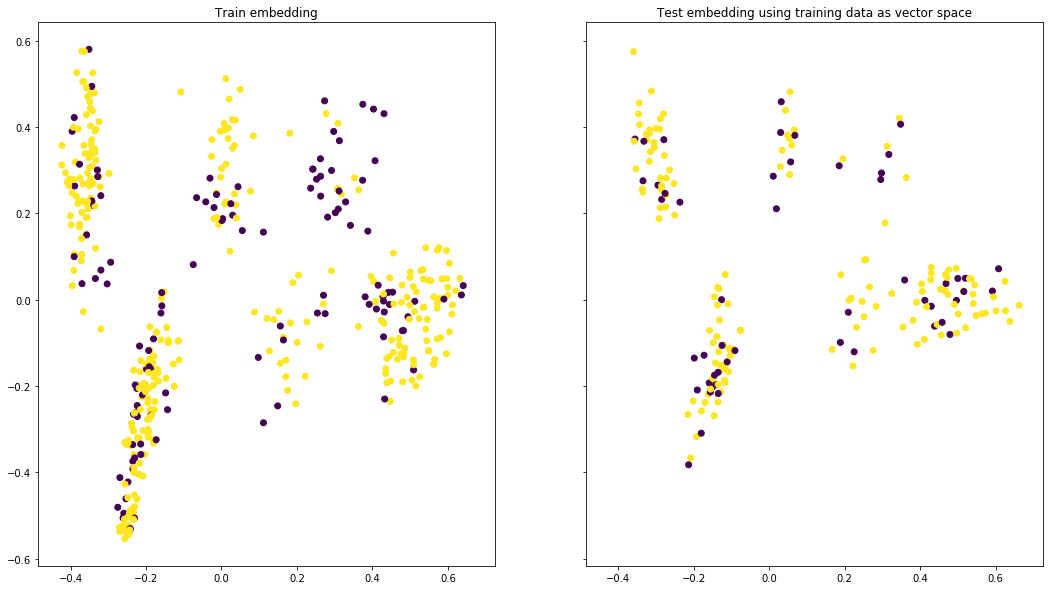

In [97]:
train_emb_plot = pd.merge(emb_train_ge_pln, outcome[outcome["patient_ID"].isin(emb_train_ge_pln["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test_ge_pln, outcome[outcome["patient_ID"].isin(emb_test["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding')
ax2.set_title('Test embedding using training data as vector space')

In [98]:
train_set = ppty_vector_train["patient_ID"].tolist() 
test_set = ppty_vector_test["patient_ID"].tolist()

In [99]:
emb_all_ge_pln = pd.merge(emb_train_ge_pln.append(emb_test_ge_pln), outcome, on="patient_ID")
emb_all_ge_pln = emb_all_ge_pln.dropna()

In [32]:
result = find_best_dim(emb_all_ge_pln.set_index("patient_ID").astype("float64"),scoring="balanced_accuracy", scale_pos_weight=True, train_set=train_set,test_set=test_set)

------------ Dimention 2
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s



 Time taken: 0 hours 0 minutes and 1.68 seconds.
Best Score: 63.565%
{'n_estimators': 700, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.635647
recall_0             0.558333
precision_0          0.416171
recall_1             0.712960
precision_1          0.815998
auc                  0.654730
dtype: float64
tn: 19, fp:32, fn:69, tp:73
[[19 32]
 [69 73]]
--- Test score
balanced_accuracy      0.443317
recall_0               0.372549
precision_0            0.215909
recall_1               0.514085
precision_1            0.695238
auc                    0.446838
False_positive_rate    0.627451
False_negative_rate    0.485915
dtype: float64
------------ Dimention 3
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s



 Time taken: 0 hours 0 minutes and 1.41 seconds.
Best Score: 63.366%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.633660
recall_0             0.633333
precision_0          0.381452
recall_1             0.633986
precision_1          0.830248
auc                  0.666674
dtype: float64
tn: 30, fp:21, fn:88, tp:54
[[30 21]
 [88 54]]
--- Test score
balanced_accuracy      0.484258
recall_0               0.588235
precision_0            0.254237
recall_1               0.380282
precision_1            0.720000
auc                    0.442281
False_positive_rate    0.411765
False_negative_rate    0.619718
dtype: float64
------------ Dimention 4
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s



 Time taken: 0 hours 0 minutes and 1.6 seconds.
Best Score: 71.052%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.710524
recall_0             0.683333
precision_0          0.484893
recall_1             0.737716
precision_1          0.868206
auc                  0.755930
dtype: float64
tn: 35, fp:16, fn:74, tp:68
[[35 16]
 [74 68]]
--- Test score
balanced_accuracy      0.582574
recall_0               0.686275
precision_0            0.321101
recall_1               0.478873
precision_1            0.809524
auc                    0.584231
False_positive_rate    0.313725
False_negative_rate    0.521127
dtype: float64
------------ Dimention 5
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.3s finished



 Time taken: 0 hours 0 minutes and 1.81 seconds.
Best Score: 70.780%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.707803
recall_0             0.675000
precision_0          0.483525
recall_1             0.740606
precision_1          0.865370
auc                  0.769007
dtype: float64
tn: 34, fp:17, fn:64, tp:78
[[34 17]
 [64 78]]
--- Test score
balanced_accuracy      0.607981
recall_0               0.666667
precision_0            0.346939
recall_1               0.549296
precision_1            0.821053
auc                    0.609914
False_positive_rate    0.333333
False_negative_rate    0.450704
dtype: float64
------------ Dimention 6
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.3s finished



 Time taken: 0 hours 0 minutes and 1.8 seconds.
Best Score: 69.848%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.698479
recall_0             0.741667
precision_0          0.439674
recall_1             0.655291
precision_1          0.877957
auc                  0.754456
dtype: float64
tn: 37, fp:14, fn:84, tp:58
[[37 14]
 [84 58]]
--- Test score
balanced_accuracy      0.566970
recall_0               0.725490
precision_0            0.305785
recall_1               0.408451
precision_1            0.805556
auc                    0.631041
False_positive_rate    0.274510
False_negative_rate    0.591549
dtype: float64
------------ Dimention 7
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.5s finished



 Time taken: 0 hours 0 minutes and 2.1 seconds.
Best Score: 69.334%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.693339
recall_0             0.691667
precision_0          0.450310
recall_1             0.695012
precision_1          0.865353
auc                  0.760927
dtype: float64
tn: 36, fp:15, fn:79, tp:63
[[36 15]
 [79 63]]
--- Test score
balanced_accuracy      0.574772
recall_0               0.705882
precision_0            0.313043
recall_1               0.443662
precision_1            0.807692
auc                    0.623792
False_positive_rate    0.294118
False_negative_rate    0.556338
dtype: float64
------------ Dimention 8
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.5s finished



 Time taken: 0 hours 0 minutes and 1.89 seconds.
Best Score: 68.519%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.685192
recall_0             0.608333
precision_0          0.481999
recall_1             0.762051
precision_1          0.842210
auc                  0.746162
dtype: float64
tn: 37, fp:14, fn:80, tp:62
[[37 14]
 [80 62]]
--- Test score
balanced_accuracy      0.581055
recall_0               0.725490
precision_0            0.316239
recall_1               0.436620
precision_1            0.815789
auc                    0.602182
False_positive_rate    0.274510
False_negative_rate    0.563380
dtype: float64
------------ Dimention 9
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.4s remaining:    0.3s



 Time taken: 0 hours 0 minutes and 2.06 seconds.
Best Score: 69.142%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.691422
recall_0             0.700000
precision_0          0.444533
recall_1             0.682844
precision_1          0.867143
auc                  0.761811
dtype: float64
tn: 36, fp:15, fn:74, tp:68
[[36 15]
 [74 68]]
--- Test score
balanced_accuracy      0.592378
recall_0               0.705882
precision_0            0.327273
recall_1               0.478873
precision_1            0.819277
auc                    0.614747
False_positive_rate    0.294118
False_negative_rate    0.521127
dtype: float64
------------ Dimention 10
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.23 seconds.
Best Score: 68.761%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.687611
recall_0             0.683333
precision_0          0.446262
recall_1             0.691888
precision_1          0.860926
auc                  0.756144
dtype: float64
tn: 37, fp:14, fn:78, tp:64
[[37 14]
 [78 64]]
--- Test score
balanced_accuracy      0.588097
recall_0               0.725490
precision_0            0.321739
recall_1               0.450704
precision_1            0.820513
auc                    0.633320
False_positive_rate    0.274510
False_negative_rate    0.549296
dtype: float64
------------ Dimention 11
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s



 Time taken: 0 hours 0 minutes and 2.37 seconds.
Best Score: 70.390%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.703899
recall_0             0.725000
precision_0          0.453544
recall_1             0.682797
precision_1          0.873719
auc                  0.752685
dtype: float64
tn: 39, fp:12, fn:79, tp:63
[[39 12]
 [79 63]]
--- Test score
balanced_accuracy      0.604184
recall_0               0.764706
precision_0            0.330508
recall_1               0.443662
precision_1            0.840000
auc                    0.661212
False_positive_rate    0.235294
False_negative_rate    0.556338
dtype: float64
------------ Dimention 12
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.38 seconds.
Best Score: 69.928%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.699283
recall_0             0.725000
precision_0          0.447742
recall_1             0.673566
precision_1          0.871871
auc                  0.746709
dtype: float64
tn: 37, fp:14, fn:78, tp:64
[[37 14]
 [78 64]]
--- Test score
balanced_accuracy      0.588097
recall_0               0.725490
precision_0            0.321739
recall_1               0.450704
precision_1            0.820513
auc                    0.654584
False_positive_rate    0.274510
False_negative_rate    0.549296
dtype: float64
------------ Dimention 13
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s



 Time taken: 0 hours 0 minutes and 2.47 seconds.
Best Score: 71.147%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.711474
recall_0             0.725000
precision_0          0.468872
recall_1             0.697949
precision_1          0.876178
auc                  0.763510
dtype: float64
tn: 38, fp:13, fn:75, tp:67
[[38 13]
 [75 67]]
--- Test score
balanced_accuracy      0.608465
recall_0               0.745098
precision_0            0.336283
recall_1               0.471831
precision_1            0.837500
auc                    0.645333
False_positive_rate    0.254902
False_negative_rate    0.528169
dtype: float64
------------ Dimention 14
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.5 seconds.
Best Score: 70.721%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.707209
recall_0             0.625000
precision_0          0.520397
recall_1             0.789417
precision_1          0.852422
auc                  0.758943
dtype: float64
tn: 36, fp:15, fn:64, tp:78
[[36 15]
 [64 78]]
--- Test score
balanced_accuracy      0.627589
recall_0               0.705882
precision_0            0.360000
recall_1               0.549296
precision_1            0.838710
auc                    0.631524
False_positive_rate    0.294118
False_negative_rate    0.450704
dtype: float64
------------ Dimention 15
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.73 seconds.
Best Score: 69.251%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.692512
recall_0             0.708333
precision_0          0.442038
recall_1             0.676690
precision_1          0.866943
auc                  0.746709
dtype: float64
tn: 39, fp:12, fn:81, tp:61
[[39 12]
 [81 61]]
--- Test score
balanced_accuracy      0.597142
recall_0               0.764706
precision_0            0.325000
recall_1               0.429577
precision_1            0.835616
auc                    0.644919
False_positive_rate    0.235294
False_negative_rate    0.570423
dtype: float64
------------ Dimention 16
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.63 seconds.
Best Score: 70.352%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.703520
recall_0             0.700000
precision_0          0.465668
recall_1             0.707040
precision_1          0.868473
auc                  0.765724
dtype: float64
tn: 38, fp:13, fn:75, tp:67
[[38 13]
 [75 67]]
--- Test score
balanced_accuracy      0.608465
recall_0               0.745098
precision_0            0.336283
recall_1               0.471831
precision_1            0.837500
auc                    0.650994
False_positive_rate    0.254902
False_negative_rate    0.528169
dtype: float64
------------ Dimention 17
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.84 seconds.
Best Score: 70.439%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.704394
recall_0             0.683333
precision_0          0.473893
recall_1             0.725455
precision_1          0.865291
auc                  0.765063
dtype: float64
tn: 38, fp:13, fn:72, tp:70
[[38 13]
 [72 70]]
--- Test score
balanced_accuracy      0.619028
recall_0               0.745098
precision_0            0.345455
recall_1               0.492958
precision_1            0.843373
auc                    0.645816
False_positive_rate    0.254902
False_negative_rate    0.507042
dtype: float64
------------ Dimention 18
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.97 seconds.
Best Score: 70.811%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.708112
recall_0             0.700000
precision_0          0.476004
recall_1             0.716224
precision_1          0.867987
auc                  0.766621
dtype: float64
tn: 37, fp:14, fn:70, tp:72
[[37 14]
 [70 72]]
--- Test score
balanced_accuracy      0.616266
recall_0               0.725490
precision_0            0.345794
recall_1               0.507042
precision_1            0.837209
auc                    0.643814
False_positive_rate    0.274510
False_negative_rate    0.492958
dtype: float64
------------ Dimention 19
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 2.92 seconds.
Best Score: 68.593%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.685927
recall_0             0.591667
precision_0          0.496150
recall_1             0.780186
precision_1          0.839464
auc                  0.757424
dtype: float64
tn: 35, fp:16, fn:68, tp:74
[[35 16]
 [68 74]]
--- Test score
balanced_accuracy      0.603701
recall_0               0.686275
precision_0            0.339806
recall_1               0.521127
precision_1            0.822222
auc                    0.624620
False_positive_rate    0.313725
False_negative_rate    0.478873
dtype: float64
------------ Dimention 20
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.92 seconds.
Best Score: 69.469%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.694685
recall_0             0.600000
precision_0          0.510781
recall_1             0.789371
precision_1          0.843475
auc                  0.759454
dtype: float64
tn: 35, fp:16, fn:69, tp:73
[[35 16]
 [69 73]]
--- Test score
balanced_accuracy      0.600180
recall_0               0.686275
precision_0            0.336538
recall_1               0.514085
precision_1            0.820225
auc                    0.624896
False_positive_rate    0.313725
False_negative_rate    0.485915
dtype: float64
------------ Dimention 21
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.07 seconds.
Best Score: 68.898%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.688980
recall_0             0.591667
precision_0          0.502932
recall_1             0.786294
precision_1          0.840360
auc                  0.756249
dtype: float64
tn: 37, fp:14, fn:66, tp:76
[[37 14]
 [66 76]]
--- Test score
balanced_accuracy      0.630351
recall_0               0.725490
precision_0            0.359223
recall_1               0.535211
precision_1            0.844444
auc                    0.631455
False_positive_rate    0.274510
False_negative_rate    0.464789
dtype: float64
------------ Dimention 22
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.6s finished



 Time taken: 0 hours 0 minutes and 3.27 seconds.
Best Score: 70.498%
{'n_estimators': 600, 'scale_pos_weight': 1, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 2, 'learning_rate': 0.03, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.704977
recall_0             0.483333
precision_0          0.698235
recall_1             0.926620
precision_1          0.830942
auc                  0.747393
dtype: float64
tn: 16, fp:35, fn:33, tp:109
[[ 16  35]
 [ 33 109]]
--- Test score
balanced_accuracy      0.540666
recall_0               0.313725
precision_0            0.326531
recall_1               0.767606
precision_1            0.756944
auc                    0.592516
False_positive_rate    0.686275
False_negative_rate    0.232394
dtype: float64
------------ Dimention 23
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.6s finished



 Time taken: 0 hours 0 minutes and 3.24 seconds.
Best Score: 69.795%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.697955
recall_0             0.658333
precision_0          0.475490
recall_1             0.737576
precision_1          0.857189
auc                  0.774229
dtype: float64
tn: 37, fp:14, fn:69, tp:73
[[37 14]
 [69 73]]
--- Test score
balanced_accuracy      0.619787
recall_0               0.725490
precision_0            0.349057
recall_1               0.514085
precision_1            0.839080
auc                    0.635253
False_positive_rate    0.274510
False_negative_rate    0.485915
dtype: float64
------------ Dimention 24
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 3.35 seconds.
Best Score: 69.885%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.698852
recall_0             0.608333
precision_0          0.508854
recall_1             0.789371
precision_1          0.848132
auc                  0.763106
dtype: float64
tn: 35, fp:16, fn:61, tp:81
[[35 16]
 [61 81]]
--- Test score
balanced_accuracy      0.628349
recall_0               0.686275
precision_0            0.364583
recall_1               0.570423
precision_1            0.835052
auc                    0.630213
False_positive_rate    0.313725
False_negative_rate    0.429577
dtype: float64
------------ Dimention 25
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.8s finished



 Time taken: 0 hours 0 minutes and 3.53 seconds.
Best Score: 69.816%
{'n_estimators': 700, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.698164
recall_0             0.591667
precision_0          0.521656
recall_1             0.804662
precision_1          0.844958
auc                  0.762127
dtype: float64
tn: 30, fp:21, fn:69, tp:73
[[30 21]
 [69 73]]
--- Test score
balanced_accuracy      0.551160
recall_0               0.588235
precision_0            0.303030
recall_1               0.514085
precision_1            0.776596
auc                    0.560342
False_positive_rate    0.411765
False_negative_rate    0.485915
dtype: float64
------------ Dimention 26
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.48 seconds.
Best Score: 69.360%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.693596
recall_0             0.591667
precision_0          0.511429
recall_1             0.795524
precision_1          0.842814
auc                  0.761317
dtype: float64
tn: 35, fp:16, fn:66, tp:76
[[35 16]
 [66 76]]
--- Test score
balanced_accuracy      0.610743
recall_0               0.686275
precision_0            0.346535
recall_1               0.535211
precision_1            0.826087
auc                    0.626277
False_positive_rate    0.313725
False_negative_rate    0.464789
dtype: float64
------------ Dimention 27
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.51 seconds.
Best Score: 70.044%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.700437
recall_0             0.608333
precision_0          0.511892
recall_1             0.792541
precision_1          0.848784
auc                  0.758555
dtype: float64
tn: 35, fp:16, fn:63, tp:79
[[35 16]
 [63 79]]
--- Test score
balanced_accuracy      0.621306
recall_0               0.686275
precision_0            0.357143
recall_1               0.556338
precision_1            0.831579
auc                    0.620892
False_positive_rate    0.313725
False_negative_rate    0.443662
dtype: float64
------------ Dimention 28
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.68 seconds.
Best Score: 70.688%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.706876
recall_0             0.600000
precision_0          0.540337
recall_1             0.813753
precision_1          0.848030
auc                  0.766884
dtype: float64
tn: 31, fp:20, fn:63, tp:79
[[31 20]
 [63 79]]
--- Test score
balanced_accuracy      0.582091
recall_0               0.607843
precision_0            0.329787
recall_1               0.556338
precision_1            0.797980
auc                    0.604598
False_positive_rate    0.392157
False_negative_rate    0.443662
dtype: float64
------------ Dimention 29
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s



 Time taken: 0 hours 0 minutes and 3.71 seconds.
Best Score: 69.932%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.699324
recall_0             0.600000
precision_0          0.516553
recall_1             0.798648
precision_1          0.847117
auc                  0.764887
dtype: float64
tn: 33, fp:18, fn:65, tp:77
[[33 18]
 [65 77]]
--- Test score
balanced_accuracy      0.594656
recall_0               0.647059
precision_0            0.336735
recall_1               0.542254
precision_1            0.810526
auc                    0.604943
False_positive_rate    0.352941
False_negative_rate    0.457746
dtype: float64
------------ Dimention 30
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s



 Time taken: 0 hours 0 minutes and 3.86 seconds.
Best Score: 69.663%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.696626
recall_0             0.591667
precision_0          0.520835
recall_1             0.801585
precision_1          0.843929
auc                  0.761946
dtype: float64
tn: 32, fp:19, fn:65, tp:77
[[32 19]
 [65 77]]
--- Test score
balanced_accuracy      0.584852
recall_0               0.627451
precision_0            0.329897
recall_1               0.542254
precision_1            0.802083
auc                    0.600870
False_positive_rate    0.372549
False_negative_rate    0.457746
dtype: float64
------------ Dimention 31
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.71 seconds.
Best Score: 69.928%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.699277
recall_0             0.600000
precision_0          0.523564
recall_1             0.798555
precision_1          0.845781
auc                  0.765913
dtype: float64
tn: 33, fp:18, fn:62, tp:80
[[33 18]
 [62 80]]
--- Test score
balanced_accuracy      0.605220
recall_0               0.647059
precision_0            0.347368
recall_1               0.563380
precision_1            0.816327
auc                    0.611088
False_positive_rate    0.352941
False_negative_rate    0.436620
dtype: float64
------------ Dimention 32
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.86 seconds.
Best Score: 69.847%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.698473
recall_0             0.616667
precision_0          0.503799
recall_1             0.780280
precision_1          0.850207
auc                  0.734679
dtype: float64
tn: 32, fp:19, fn:81, tp:61
[[32 19]
 [81 61]]
--- Test score
balanced_accuracy      0.528514
recall_0               0.627451
precision_0            0.283186
recall_1               0.429577
precision_1            0.762500
auc                    0.512842
False_positive_rate    0.372549
False_negative_rate    0.570423
dtype: float64
------------ Dimention 33
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s



 Time taken: 0 hours 0 minutes and 3.81 seconds.
Best Score: 70.252%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.702523
recall_0             0.625000
precision_0          0.515445
recall_1             0.780047
precision_1          0.849543
auc                  0.745282
dtype: float64
tn: 31, fp:20, fn:83, tp:59
[[31 20]
 [83 59]]
--- Test score
balanced_accuracy      0.511668
recall_0               0.607843
precision_0            0.271930
recall_1               0.415493
precision_1            0.746835
auc                    0.511875
False_positive_rate    0.392157
False_negative_rate    0.584507
dtype: float64
------------ Dimention 34
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.4s finished



 Time taken: 0 hours 0 minutes and 4.11 seconds.
Best Score: 70.979%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


--- Validation score
balanced_accuracy    0.709790
recall_0             0.633333
precision_0          0.525392
recall_1             0.786247
precision_1          0.855308
auc                  0.763388
dtype: float64
tn: 33, fp:18, fn:64, tp:78
[[33 18]
 [64 78]]
--- Test score
balanced_accuracy      0.598177
recall_0               0.647059
precision_0            0.340206
recall_1               0.549296
precision_1            0.812500
auc                    0.601629
False_positive_rate    0.352941
False_negative_rate    0.450704
dtype: float64
------------ Dimention 35
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.5s finished



 Time taken: 0 hours 0 minutes and 4.39 seconds.
Best Score: 69.700%
{'n_estimators': 700, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.697005
recall_0             0.583333
precision_0          0.532376
recall_1             0.810676
precision_1          0.841595
auc                  0.747552
dtype: float64
tn: 28, fp:23, fn:64, tp:78
[[28 23]
 [64 78]]
--- Test score
balanced_accuracy      0.549158
recall_0               0.549020
precision_0            0.304348
recall_1               0.549296
precision_1            0.772277
auc                    0.547777
False_positive_rate    0.450980
False_negative_rate    0.450704
dtype: float64
------------ Dimention 36
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.4s finished



 Time taken: 0 hours 0 minutes and 4.23 seconds.
Best Score: 71.029%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.710286
recall_0             0.625000
precision_0          0.529279
recall_1             0.795571
precision_1          0.853966
auc                  0.761999
dtype: float64
tn: 32, fp:19, fn:73, tp:69
[[32 19]
 [73 69]]
--- Test score
balanced_accuracy      0.556683
recall_0               0.627451
precision_0            0.304762
recall_1               0.485915
precision_1            0.784091
auc                    0.596520
False_positive_rate    0.372549
False_negative_rate    0.514085
dtype: float64
------------ Dimention 37
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.5s finished



 Time taken: 0 hours 0 minutes and 4.27 seconds.
Best Score: 69.776%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.697762
recall_0             0.600000
precision_0          0.519575
recall_1             0.795524
precision_1          0.845418
auc                  0.770177
dtype: float64
tn: 35, fp:16, fn:71, tp:71
[[35 16]
 [71 71]]
--- Test score
balanced_accuracy      0.593137
recall_0               0.686275
precision_0            0.330189
recall_1               0.500000
precision_1            0.816092
auc                    0.605358
False_positive_rate    0.313725
False_negative_rate    0.500000
dtype: float64
------------ Dimention 38
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.6s finished



 Time taken: 0 hours 0 minutes and 4.49 seconds.
Best Score: 70.763%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.707634
recall_0             0.616667
precision_0          0.532883
recall_1             0.798601
precision_1          0.851182
auc                  0.768017
dtype: float64
tn: 33, fp:18, fn:73, tp:69
[[33 18]
 [73 69]]
--- Test score
balanced_accuracy      0.566487
recall_0               0.647059
precision_0            0.311321
recall_1               0.485915
precision_1            0.793103
auc                    0.597901
False_positive_rate    0.352941
False_negative_rate    0.514085
dtype: float64
------------ Dimention 39
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.7s finished



 Time taken: 0 hours 0 minutes and 4.58 seconds.
Best Score: 69.471%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.694709
recall_0             0.600000
precision_0          0.509663
recall_1             0.789417
precision_1          0.844969
auc                  0.764544
dtype: float64
tn: 32, fp:19, fn:75, tp:67
[[32 19]
 [75 67]]
--- Test score
balanced_accuracy      0.549641
recall_0               0.627451
precision_0            0.299065
recall_1               0.471831
precision_1            0.779070
auc                    0.583264
False_positive_rate    0.372549
False_negative_rate    0.528169
dtype: float64
------------ Dimention 40
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.9s finished



 Time taken: 0 hours 0 minutes and 4.68 seconds.
Best Score: 69.990%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.699895
recall_0             0.650000
precision_0          0.488556
recall_1             0.749790
precision_1          0.855281
auc                  0.761739
dtype: float64
tn: 38, fp:13, fn:76, tp:66
[[38 13]
 [76 66]]
--- Test score
balanced_accuracy      0.604943
recall_0               0.745098
precision_0            0.333333
recall_1               0.464789
precision_1            0.835443
auc                    0.616266
False_positive_rate    0.254902
False_negative_rate    0.535211
dtype: float64
------------ Dimention 41
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s



 Time taken: 0 hours 0 minutes and 4.4 seconds.
Best Score: 70.297%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.702972
recall_0             0.616667
precision_0          0.523497
recall_1             0.789277
precision_1          0.849588
auc                  0.741404
dtype: float64
tn: 33, fp:18, fn:81, tp:61
[[33 18]
 [81 61]]
--- Test score
balanced_accuracy      0.538318
recall_0               0.647059
precision_0            0.289474
recall_1               0.429577
precision_1            0.772152
auc                    0.547501
False_positive_rate    0.352941
False_negative_rate    0.570423
dtype: float64
------------ Dimention 42
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.0s finished



 Time taken: 0 hours 0 minutes and 4.67 seconds.
Best Score: 70.667%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.706667
recall_0             0.666667
precision_0          0.496075
recall_1             0.746667
precision_1          0.859778
auc                  0.767669
dtype: float64
tn: 39, fp:12, fn:74, tp:68
[[39 12]
 [74 68]]
--- Test score
balanced_accuracy      0.621790
recall_0               0.764706
precision_0            0.345133
recall_1               0.478873
precision_1            0.850000
auc                    0.601629
False_positive_rate    0.235294
False_negative_rate    0.521127
dtype: float64
------------ Dimention 43
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.9s finished



 Time taken: 0 hours 0 minutes and 4.67 seconds.
Best Score: 69.838%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.698380
recall_0             0.650000
precision_0          0.488924
recall_1             0.746760
precision_1          0.854605
auc                  0.765917
dtype: float64
tn: 37, fp:14, fn:70, tp:72
[[37 14]
 [70 72]]
--- Test score
balanced_accuracy      0.616266
recall_0               0.725490
precision_0            0.345794
recall_1               0.507042
precision_1            0.837209
auc                    0.625932
False_positive_rate    0.274510
False_negative_rate    0.492958
dtype: float64
------------ Dimention 44
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s



 Time taken: 0 hours 0 minutes and 4.65 seconds.
Best Score: 71.022%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.710216
recall_0             0.625000
precision_0          0.527473
recall_1             0.795431
precision_1          0.853686
auc                  0.753619
dtype: float64
tn: 31, fp:20, fn:86, tp:56
[[31 20]
 [86 56]]
--- Test score
balanced_accuracy      0.501105
recall_0               0.607843
precision_0            0.264957
recall_1               0.394366
precision_1            0.736842
auc                    0.519194
False_positive_rate    0.392157
False_negative_rate    0.605634
dtype: float64
------------ Dimention 45
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.2s finished



 Time taken: 0 hours 0 minutes and 5.09 seconds.
Best Score: 71.334%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.713339
recall_0             0.625000
precision_0          0.536278
recall_1             0.801678
precision_1          0.854686
auc                  0.778087
dtype: float64
tn: 33, fp:18, fn:70, tp:72
[[33 18]
 [70 72]]
--- Test score
balanced_accuracy      0.577051
recall_0               0.647059
precision_0            0.320388
recall_1               0.507042
precision_1            0.800000
auc                    0.610467
False_positive_rate    0.352941
False_negative_rate    0.492958
dtype: float64
------------ Dimention 46
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.2s finished



 Time taken: 0 hours 0 minutes and 5.12 seconds.
Best Score: 70.501%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.705006
recall_0             0.608333
precision_0          0.527710
recall_1             0.801678
precision_1          0.849415
auc                  0.769413
dtype: float64
tn: 32, fp:19, fn:76, tp:66
[[32 19]
 [76 66]]
--- Test score
balanced_accuracy      0.546120
recall_0               0.627451
precision_0            0.296296
recall_1               0.464789
precision_1            0.776471
auc                    0.583817
False_positive_rate    0.372549
False_negative_rate    0.535211
dtype: float64
------------ Dimention 47
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.3s finished



 Time taken: 0 hours 0 minutes and 5.29 seconds.
Best Score: 69.776%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.697762
recall_0             0.600000
precision_0          0.514897
recall_1             0.795524
precision_1          0.845895
auc                  0.769716
dtype: float64
tn: 32, fp:19, fn:71, tp:71
[[32 19]
 [71 71]]
--- Test score
balanced_accuracy      0.563725
recall_0               0.627451
precision_0            0.310680
recall_1               0.500000
precision_1            0.788889
auc                    0.593897
False_positive_rate    0.372549
False_negative_rate    0.500000
dtype: float64
------------ Dimention 48
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.3s finished



 Time taken: 0 hours 0 minutes and 5.01 seconds.
Best Score: 70.380%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.703800
recall_0             0.600000
precision_0          0.535155
recall_1             0.807599
precision_1          0.846579
auc                  0.755734
dtype: float64
tn: 32, fp:19, fn:83, tp:59
[[32 19]
 [83 59]]
--- Test score
balanced_accuracy      0.521472
recall_0               0.627451
precision_0            0.278261
recall_1               0.415493
precision_1            0.756410
auc                    0.529826
False_positive_rate    0.372549
False_negative_rate    0.584507
dtype: float64
------------ Dimention 49
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.4s finished



 Time taken: 0 hours 0 minutes and 5.18 seconds.
Best Score: 70.541%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.705408
recall_0             0.600000
precision_0          0.538732
recall_1             0.810816
precision_1          0.848015
auc                  0.765517
dtype: float64
tn: 34, fp:17, fn:69, tp:73
[[34 17]
 [69 73]]
--- Test score
balanced_accuracy      0.590376
recall_0               0.666667
precision_0            0.330097
recall_1               0.514085
precision_1            0.811111
auc                    0.607153
False_positive_rate    0.333333
False_negative_rate    0.485915
dtype: float64
------------ Dimention 50
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.4s finished



 Time taken: 0 hours 0 minutes and 5.48 seconds.
Best Score: 69.781%
{'n_estimators': 700, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.697809
recall_0             0.566667
precision_0          0.550950
recall_1             0.828951
precision_1          0.839734
auc                  0.747537
dtype: float64
tn: 28, fp:23, fn:74, tp:68
[[28 23]
 [74 68]]
--- Test score
balanced_accuracy      0.513946
recall_0               0.549020
precision_0            0.274510
recall_1               0.478873
precision_1            0.747253
auc                    0.540320
False_positive_rate    0.450980
False_negative_rate    0.521127
dtype: float64
------------ Dimention 51
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.5s finished



 Time taken: 0 hours 0 minutes and 5.49 seconds.
Best Score: 69.710%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.697104
recall_0             0.675000
precision_0          0.465578
recall_1             0.719207
precision_1          0.859803
auc                  0.740546
dtype: float64
tn: 37, fp:14, fn:96, tp:46
[[37 14]
 [96 46]]
--- Test score
balanced_accuracy      0.524717
recall_0               0.725490
precision_0            0.278195
recall_1               0.323944
precision_1            0.766667
auc                    0.555510
False_positive_rate    0.274510
False_negative_rate    0.676056
dtype: float64
------------ Dimention 52
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.6s finished



 Time taken: 0 hours 0 minutes and 5.43 seconds.
Best Score: 69.861%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.698613
recall_0             0.583333
precision_0          0.531483
recall_1             0.813893
precision_1          0.843127
auc                  0.761338
dtype: float64
tn: 34, fp:17, fn:73, tp:69
[[34 17]
 [73 69]]
--- Test score
balanced_accuracy      0.576291
recall_0               0.666667
precision_0            0.317757
recall_1               0.485915
precision_1            0.802326
auc                    0.597625
False_positive_rate    0.333333
False_negative_rate    0.514085
dtype: float64
------------ Dimention 53
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.6s finished



 Time taken: 0 hours 0 minutes and 5.61 seconds.
Best Score: 69.583%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.695828
recall_0             0.766667
precision_0          0.430028
recall_1             0.624988
precision_1          0.887110
auc                  0.739108
dtype: float64
tn: 42, fp:9, fn:101, tp:41
[[ 42   9]
 [101  41]]
--- Test score
balanced_accuracy      0.556131
recall_0               0.823529
precision_0            0.293706
recall_1               0.288732
precision_1            0.820000
auc                    0.614264
False_positive_rate    0.176471
False_negative_rate    0.711268
dtype: float64
------------ Dimention 54
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.8s finished



 Time taken: 0 hours 0 minutes and 5.75 seconds.
Best Score: 69.914%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.699138
recall_0             0.666667
precision_0          0.475083
recall_1             0.731608
precision_1          0.858403
auc                  0.756208
dtype: float64
tn: 37, fp:14, fn:82, tp:60
[[37 14]
 [82 60]]
--- Test score
balanced_accuracy      0.574013
recall_0               0.725490
precision_0            0.310924
recall_1               0.422535
precision_1            0.810811
auc                    0.595485
False_positive_rate    0.274510
False_negative_rate    0.577465
dtype: float64
------------ Dimention 55
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.7s finished



 Time taken: 0 hours 0 minutes and 5.62 seconds.
Best Score: 69.339%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.693386
recall_0             0.658333
precision_0          0.472829
recall_1             0.728438
precision_1          0.855292
auc                  0.756416
dtype: float64
tn: 37, fp:14, fn:72, tp:70
[[37 14]
 [72 70]]
--- Test score
balanced_accuracy      0.609224
recall_0               0.725490
precision_0            0.339450
recall_1               0.492958
precision_1            0.833333
auc                    0.616750
False_positive_rate    0.274510
False_negative_rate    0.507042
dtype: float64
------------ Dimention 56
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.8s finished



 Time taken: 0 hours 0 minutes and 5.69 seconds.
Best Score: 69.836%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.698357
recall_0             0.650000
precision_0          0.485727
recall_1             0.746713
precision_1          0.854903
auc                  0.761622
dtype: float64
tn: 39, fp:12, fn:71, tp:71
[[39 12]
 [71 71]]
--- Test score
balanced_accuracy      0.632353
recall_0               0.764706
precision_0            0.354545
recall_1               0.500000
precision_1            0.855422
auc                    0.608534
False_positive_rate    0.235294
False_negative_rate    0.500000
dtype: float64
------------ Dimention 57
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.1s finished



 Time taken: 0 hours 0 minutes and 5.76 seconds.
Best Score: 69.021%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.690210
recall_0             0.566667
precision_0          0.526722
recall_1             0.813753
precision_1          0.838082
auc                  0.745913
dtype: float64
tn: 35, fp:16, fn:92, tp:50
[[35 16]
 [92 50]]
--- Test score
balanced_accuracy      0.519194
recall_0               0.686275
precision_0            0.275591
recall_1               0.352113
precision_1            0.757576
auc                    0.509528
False_positive_rate    0.313725
False_negative_rate    0.647887
dtype: float64
------------ Dimention 58
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.0s finished



 Time taken: 0 hours 0 minutes and 5.95 seconds.
Best Score: 70.276%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.702756
recall_0             0.591667
precision_0          0.536463
recall_1             0.813846
precision_1          0.846040
auc                  0.762628
dtype: float64
tn: 34, fp:17, fn:77, tp:65
[[34 17]
 [77 65]]
--- Test score
balanced_accuracy      0.562207
recall_0               0.666667
precision_0            0.306306
recall_1               0.457746
precision_1            0.792683
auc                    0.600110
False_positive_rate    0.333333
False_negative_rate    0.542254
dtype: float64
------------ Dimention 59
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.0s finished



 Time taken: 0 hours 0 minutes and 6.03 seconds.
Best Score: 68.678%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.686777
recall_0             0.575000
precision_0          0.508147
recall_1             0.798555
precision_1          0.837998
auc                  0.757411
dtype: float64
tn: 34, fp:17, fn:76, tp:66
[[34 17]
 [76 66]]
--- Test score
balanced_accuracy      0.565728
recall_0               0.666667
precision_0            0.309091
recall_1               0.464789
precision_1            0.795181
auc                    0.588650
False_positive_rate    0.333333
False_negative_rate    0.535211
dtype: float64
------------ Dimention 60
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.2s finished



 Time taken: 0 hours 0 minutes and 5.95 seconds.
Best Score: 69.961%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.699610
recall_0             0.591667
precision_0          0.528352
recall_1             0.807552
precision_1          0.844872
auc                  0.742455
dtype: float64
tn: 33, fp:18, fn:83, tp:59
[[33 18]
 [83 59]]
--- Test score
balanced_accuracy      0.531276
recall_0               0.647059
precision_0            0.284483
recall_1               0.415493
precision_1            0.766234
auc                    0.525545
False_positive_rate    0.352941
False_negative_rate    0.584507
dtype: float64
------------ Dimention 61
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.2s finished



 Time taken: 0 hours 0 minutes and 6.3 seconds.
Best Score: 69.177%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.691772
recall_0             0.566667
precision_0          0.529034
recall_1             0.816876
precision_1          0.838688
auc                  0.753706
dtype: float64
tn: 31, fp:20, fn:75, tp:67
[[31 20]
 [75 67]]
--- Test score
balanced_accuracy      0.539837
recall_0               0.607843
precision_0            0.292453
recall_1               0.471831
precision_1            0.770115
auc                    0.594863
False_positive_rate    0.392157
False_negative_rate    0.528169
dtype: float64
------------ Dimention 62
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.3s finished



 Time taken: 0 hours 0 minutes and 6.05 seconds.
Best Score: 69.128%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.691276
recall_0             0.575000
precision_0          0.524825
recall_1             0.807552
precision_1          0.839859
auc                  0.745371
dtype: float64
tn: 36, fp:15, fn:90, tp:52
[[36 15]
 [90 52]]
--- Test score
balanced_accuracy      0.536040
recall_0               0.705882
precision_0            0.285714
recall_1               0.366197
precision_1            0.776119
auc                    0.541011
False_positive_rate    0.294118
False_negative_rate    0.633803
dtype: float64
------------ Dimention 63
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.4s finished



 Time taken: 0 hours 0 minutes and 6.1 seconds.
Best Score: 68.522%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.685216
recall_0             0.575000
precision_0          0.495313
recall_1             0.795431
precision_1          0.839458
auc                  0.741552
dtype: float64
tn: 37, fp:14, fn:92, tp:50
[[37 14]
 [92 50]]
--- Test score
balanced_accuracy      0.538801
recall_0               0.725490
precision_0            0.286822
recall_1               0.352113
precision_1            0.781250
auc                    0.508423
False_positive_rate    0.274510
False_negative_rate    0.647887
dtype: float64
------------ Dimention 64
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.3s finished



 Time taken: 0 hours 0 minutes and 6.27 seconds.
Best Score: 69.172%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.691725
recall_0             0.566667
precision_0          0.530591
recall_1             0.816783
precision_1          0.838191
auc                  0.757813
dtype: float64
tn: 32, fp:19, fn:82, tp:60
[[32 19]
 [82 60]]
--- Test score
balanced_accuracy      0.524993
recall_0               0.627451
precision_0            0.280702
recall_1               0.422535
precision_1            0.759494
auc                    0.587407
False_positive_rate    0.372549
False_negative_rate    0.577465
dtype: float64
------------ Dimention 65
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.6s finished



 Time taken: 0 hours 0 minutes and 6.23 seconds.
Best Score: 68.673%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.686731
recall_0             0.575000
precision_0          0.506674
recall_1             0.798462
precision_1          0.839353
auc                  0.730126
dtype: float64
tn: 33, fp:18, fn:90, tp:52
[[33 18]
 [90 52]]
--- Test score
balanced_accuracy      0.506628
recall_0               0.647059
precision_0            0.268293
recall_1               0.366197
precision_1            0.742857
auc                    0.504004
False_positive_rate    0.352941
False_negative_rate    0.633803
dtype: float64
------------ Dimention 66
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.6s finished



 Time taken: 0 hours 0 minutes and 6.65 seconds.
Best Score: 69.325%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.693246
recall_0             0.758333
precision_0          0.429166
recall_1             0.628159
precision_1          0.880797
auc                  0.745425
dtype: float64
tn: 43, fp:8, fn:111, tp:31
[[ 43   8]
 [111  31]]
--- Test score
balanced_accuracy      0.530724
recall_0               0.843137
precision_0            0.279221
recall_1               0.218310
precision_1            0.794872
auc                    0.602251
False_positive_rate    0.156863
False_negative_rate    0.781690
dtype: float64
------------ Dimention 67
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.6s finished



 Time taken: 0 hours 0 minutes and 6.68 seconds.
Best Score: 68.569%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.685688
recall_0             0.566667
precision_0          0.512032
recall_1             0.804709
precision_1          0.836728
auc                  0.755744
dtype: float64
tn: 31, fp:20, fn:76, tp:66
[[31 20]
 [76 66]]
--- Test score
balanced_accuracy      0.536316
recall_0               0.607843
precision_0            0.289720
recall_1               0.464789
precision_1            0.767442
auc                    0.588788
False_positive_rate    0.392157
False_negative_rate    0.535211
dtype: float64
------------ Dimention 68
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.7s finished



 Time taken: 0 hours 0 minutes and 6.71 seconds.
Best Score: 69.244%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.692442
recall_0             0.741667
precision_0          0.433463
recall_1             0.643217
precision_1          0.874683
auc                  0.737570
dtype: float64
tn: 44, fp:7, fn:106, tp:36
[[ 44   7]
 [106  36]]
--- Test score
balanced_accuracy      0.558133
recall_0               0.862745
precision_0            0.293333
recall_1               0.253521
precision_1            0.837209
auc                    0.604874
False_positive_rate    0.137255
False_negative_rate    0.746479
dtype: float64
------------ Dimention 69
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.8s finished



 Time taken: 0 hours 0 minutes and 6.9 seconds.
Best Score: 68.460%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.684598
recall_0             0.558333
precision_0          0.515346
recall_1             0.810862
precision_1          0.835776
auc                  0.757178
dtype: float64
tn: 32, fp:19, fn:69, tp:73
[[32 19]
 [69 73]]
--- Test score
balanced_accuracy      0.570768
recall_0               0.627451
precision_0            0.316832
recall_1               0.514085
precision_1            0.793478
auc                    0.602320
False_positive_rate    0.372549
False_negative_rate    0.485915
dtype: float64
------------ Dimention 70
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.9s finished



 Time taken: 0 hours 0 minutes and 7.14 seconds.
Best Score: 69.242%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.692418
recall_0             0.741667
precision_0          0.434453
recall_1             0.643170
precision_1          0.873137
auc                  0.743755
dtype: float64
tn: 43, fp:8, fn:102, tp:40
[[ 43   8]
 [102  40]]
--- Test score
balanced_accuracy      0.562414
recall_0               0.843137
precision_0            0.296552
recall_1               0.281690
precision_1            0.833333
auc                    0.620340
False_positive_rate    0.156863
False_negative_rate    0.718310
dtype: float64
------------ Dimention 71
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.8s finished



 Time taken: 0 hours 0 minutes and 7.07 seconds.
Best Score: 69.355%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.693555
recall_0             0.750000
precision_0          0.430108
recall_1             0.637110
precision_1          0.878174
auc                  0.753980
dtype: float64
tn: 42, fp:9, fn:97, tp:45
[[42  9]
 [97 45]]
--- Test score
balanced_accuracy      0.570215
recall_0               0.823529
precision_0            0.302158
recall_1               0.316901
precision_1            0.833333
auc                    0.624137
False_positive_rate    0.176471
False_negative_rate    0.683099
dtype: float64
------------ Dimention 72
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.0s finished



 Time taken: 0 hours 0 minutes and 7.1 seconds.
Best Score: 70.042%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.700420
recall_0             0.666667
precision_0          0.487565
recall_1             0.734172
precision_1          0.855271
auc                  0.755181
dtype: float64
tn: 37, fp:14, fn:94, tp:48
[[37 14]
 [94 48]]
--- Test score
balanced_accuracy      0.531759
recall_0               0.725490
precision_0            0.282443
recall_1               0.338028
precision_1            0.774194
auc                    0.587131
False_positive_rate    0.274510
False_negative_rate    0.661972
dtype: float64
------------ Dimention 73
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.9s finished



 Time taken: 0 hours 0 minutes and 6.97 seconds.
Best Score: 69.786%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.697855
recall_0             0.566667
precision_0          0.548893
recall_1             0.829044
precision_1          0.840172
auc                  0.763407
dtype: float64
tn: 31, fp:20, fn:66, tp:76
[[31 20]
 [66 76]]
--- Test score
balanced_accuracy      0.571527
recall_0               0.607843
precision_0            0.319588
recall_1               0.535211
precision_1            0.791667
auc                    0.620271
False_positive_rate    0.392157
False_negative_rate    0.464789
dtype: float64
------------ Dimention 74
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.0s finished



 Time taken: 0 hours 0 minutes and 7.18 seconds.
Best Score: 69.507%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.695070
recall_0             0.750000
precision_0          0.433658
recall_1             0.640140
precision_1          0.878670
auc                  0.753390
dtype: float64
tn: 40, fp:11, fn:94, tp:48
[[40 11]
 [94 48]]
--- Test score
balanced_accuracy      0.561171
recall_0               0.784314
precision_0            0.298507
recall_1               0.338028
precision_1            0.813559
auc                    0.618545
False_positive_rate    0.215686
False_negative_rate    0.661972
dtype: float64
------------ Dimention 75
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.2s finished



 Time taken: 0 hours 0 minutes and 7.4 seconds.
Best Score: 69.739%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.697389
recall_0             0.666667
precision_0          0.481429
recall_1             0.728112
precision_1          0.854699
auc                  0.754322
dtype: float64
tn: 35, fp:16, fn:88, tp:54
[[35 16]
 [88 54]]
--- Test score
balanced_accuracy      0.533278
recall_0               0.686275
precision_0            0.284553
recall_1               0.380282
precision_1            0.771429
auc                    0.599558
False_positive_rate    0.313725
False_negative_rate    0.619718
dtype: float64
------------ Dimention 76
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.1s finished



 Time taken: 0 hours 0 minutes and 7.39 seconds.
Best Score: 70.473%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.704726
recall_0             0.675000
precision_0          0.479147
recall_1             0.734452
precision_1          0.861707
auc                  0.747970
dtype: float64
tn: 32, fp:19, fn:89, tp:53
[[32 19]
 [89 53]]
--- Test score
balanced_accuracy      0.500345
recall_0               0.627451
precision_0            0.264463
recall_1               0.373239
precision_1            0.736111
auc                    0.587821
False_positive_rate    0.372549
False_negative_rate    0.626761
dtype: float64
------------ Dimention 77
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.3s finished



 Time taken: 0 hours 0 minutes and 7.58 seconds.
Best Score: 69.788%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.697885
recall_0             0.658333
precision_0          0.479805
recall_1             0.737436
precision_1          0.855828
auc                  0.744013
dtype: float64
tn: 36, fp:15, fn:88, tp:54
[[36 15]
 [88 54]]
--- Test score
balanced_accuracy      0.543082
recall_0               0.705882
precision_0            0.290323
recall_1               0.380282
precision_1            0.782609
auc                    0.579398
False_positive_rate    0.294118
False_negative_rate    0.619718
dtype: float64
------------ Dimention 78
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.3s finished



 Time taken: 0 hours 0 minutes and 7.35 seconds.
Best Score: 70.133%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.701334
recall_0             0.558333
precision_0          0.564573
recall_1             0.844336
precision_1          0.840318
auc                  0.767908
dtype: float64
tn: 29, fp:22, fn:67, tp:75
[[29 22]
 [67 75]]
--- Test score
balanced_accuracy      0.548398
recall_0               0.568627
precision_0            0.302083
recall_1               0.528169
precision_1            0.773196
auc                    0.600525
False_positive_rate    0.431373
False_negative_rate    0.471831
dtype: float64
------------ Dimention 79
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.5s finished



 Time taken: 0 hours 0 minutes and 7.52 seconds.
Best Score: 68.931%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.689312
recall_0             0.616667
precision_0          0.494522
recall_1             0.761958
precision_1          0.843539
auc                  0.763765
dtype: float64
tn: 39, fp:12, fn:64, tp:78
[[39 12]
 [64 78]]
--- Test score
balanced_accuracy      0.657001
recall_0               0.764706
precision_0            0.378641
recall_1               0.549296
precision_1            0.866667
auc                    0.642088
False_positive_rate    0.235294
False_negative_rate    0.450704
dtype: float64
------------ Dimention 80
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.5s finished



 Time taken: 0 hours 0 minutes and 7.61 seconds.
Best Score: 68.207%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.682069
recall_0             0.608333
precision_0          0.487118
recall_1             0.755804
precision_1          0.839401
auc                  0.755625
dtype: float64
tn: 39, fp:12, fn:69, tp:73
[[39 12]
 [69 73]]
--- Test score
balanced_accuracy      0.639395
recall_0               0.764706
precision_0            0.361111
recall_1               0.514085
precision_1            0.858824
auc                    0.640293
False_positive_rate    0.235294
False_negative_rate    0.485915
dtype: float64
------------ Dimention 81
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.5s finished



 Time taken: 0 hours 0 minutes and 7.61 seconds.
Best Score: 68.773%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.687727
recall_0             0.616667
precision_0          0.490159
recall_1             0.758788
precision_1          0.843380
auc                  0.757016
dtype: float64
tn: 37, fp:14, fn:65, tp:77
[[37 14]
 [65 77]]
--- Test score
balanced_accuracy      0.633872
recall_0               0.725490
precision_0            0.362745
recall_1               0.542254
precision_1            0.846154
auc                    0.622618
False_positive_rate    0.274510
False_negative_rate    0.457746
dtype: float64
------------ Dimention 82
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.7s finished



 Time taken: 0 hours 0 minutes and 7.82 seconds.
Best Score: 68.915%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.689149
recall_0             0.650000
precision_0          0.470663
recall_1             0.728298
precision_1          0.849770
auc                  0.748151
dtype: float64
tn: 36, fp:15, fn:92, tp:50
[[36 15]
 [92 50]]
--- Test score
balanced_accuracy      0.528998
recall_0               0.705882
precision_0            0.281250
recall_1               0.352113
precision_1            0.769231
auc                    0.586993
False_positive_rate    0.294118
False_negative_rate    0.647887
dtype: float64
------------ Dimention 83
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.7s finished



 Time taken: 0 hours 0 minutes and 7.93 seconds.
Best Score: 69.017%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690169
recall_0             0.725000
precision_0          0.436833
recall_1             0.655338
precision_1          0.868114
auc                  0.747325
dtype: float64
tn: 41, fp:10, fn:92, tp:50
[[41 10]
 [92 50]]
--- Test score
balanced_accuracy      0.578017
recall_0               0.803922
precision_0            0.308271
recall_1               0.352113
precision_1            0.833333
auc                    0.611502
False_positive_rate    0.196078
False_negative_rate    0.647887
dtype: float64
------------ Dimention 84
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.7s finished



 Time taken: 0 hours 0 minutes and 7.87 seconds.
Best Score: 67.992%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.679918
recall_0             0.716667
precision_0          0.424072
recall_1             0.643170
precision_1          0.864016
auc                  0.742990
dtype: float64
tn: 41, fp:10, fn:93, tp:49
[[41 10]
 [93 49]]
--- Test score
balanced_accuracy      0.574496
recall_0               0.803922
precision_0            0.305970
recall_1               0.345070
precision_1            0.830508
auc                    0.625725
False_positive_rate    0.196078
False_negative_rate    0.654930
dtype: float64
------------ Dimention 85
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.0s finished



 Time taken: 0 hours 0 minutes and 8.05 seconds.
Best Score: 68.446%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.684458
recall_0             0.591667
precision_0          0.501336
recall_1             0.777249
precision_1          0.838075
auc                  0.751416
dtype: float64
tn: 36, fp:15, fn:66, tp:76
[[36 15]
 [66 76]]
--- Test score
balanced_accuracy      0.620547
recall_0               0.705882
precision_0            0.352941
recall_1               0.535211
precision_1            0.835165
auc                    0.623447
False_positive_rate    0.294118
False_negative_rate    0.464789
dtype: float64
------------ Dimention 86
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.9s finished



 Time taken: 0 hours 0 minutes and 8.13 seconds.
Best Score: 69.097%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.690967
recall_0             0.550000
precision_0          0.553953
recall_1             0.831935
precision_1          0.834972
auc                  0.766634
dtype: float64
tn: 29, fp:22, fn:60, tp:82
[[29 22]
 [60 82]]
--- Test score
balanced_accuracy      0.573046
recall_0               0.568627
precision_0            0.325843
recall_1               0.577465
precision_1            0.788462
auc                    0.619028
False_positive_rate    0.431373
False_negative_rate    0.422535
dtype: float64
------------ Dimention 87
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.0s finished



 Time taken: 0 hours 0 minutes and 8.09 seconds.
Best Score: 68.811%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.688106
recall_0             0.608333
precision_0          0.496634
recall_1             0.767879
precision_1          0.841432
auc                  0.765456
dtype: float64
tn: 36, fp:15, fn:66, tp:76
[[36 15]
 [66 76]]
--- Test score
balanced_accuracy      0.620547
recall_0               0.705882
precision_0            0.352941
recall_1               0.535211
precision_1            0.835165
auc                    0.630627
False_positive_rate    0.294118
False_negative_rate    0.464789
dtype: float64
------------ Dimention 88
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.1s finished



 Time taken: 0 hours 0 minutes and 8.37 seconds.
Best Score: 68.072%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.680723
recall_0             0.700000
precision_0          0.433255
recall_1             0.661445
precision_1          0.858083
auc                  0.746447
dtype: float64
tn: 40, fp:11, fn:91, tp:51
[[40 11]
 [91 51]]
--- Test score
balanced_accuracy      0.571734
recall_0               0.784314
precision_0            0.305344
recall_1               0.359155
precision_1            0.822581
auc                    0.619718
False_positive_rate    0.215686
False_negative_rate    0.640845
dtype: float64
------------ Dimention 89
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.1s finished



 Time taken: 0 hours 0 minutes and 8.31 seconds.
Best Score: 69.258%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.692576
recall_0             0.550000
precision_0          0.550684
recall_1             0.835152
precision_1          0.836042
auc                  0.761991
dtype: float64
tn: 28, fp:23, fn:57, tp:85
[[28 23]
 [57 85]]
--- Test score
balanced_accuracy      0.573806
recall_0               0.549020
precision_0            0.329412
recall_1               0.598592
precision_1            0.787037
auc                    0.618061
False_positive_rate    0.450980
False_negative_rate    0.401408
dtype: float64
------------ Dimention 90
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.2s finished



 Time taken: 0 hours 0 minutes and 8.55 seconds.
Best Score: 68.188%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.681882
recall_0             0.708333
precision_0          0.432360
recall_1             0.655431
precision_1          0.860122
auc                  0.741653
dtype: float64
tn: 41, fp:10, fn:89, tp:53
[[41 10]
 [89 53]]
--- Test score
balanced_accuracy      0.588581
recall_0               0.803922
precision_0            0.315385
recall_1               0.373239
precision_1            0.841270
auc                    0.639948
False_positive_rate    0.196078
False_negative_rate    0.626761
dtype: float64
------------ Dimention 91
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.2s finished



 Time taken: 0 hours 0 minutes and 8.32 seconds.
Best Score: 68.593%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.685927
recall_0             0.591667
precision_0          0.499956
recall_1             0.780186
precision_1          0.838954
auc                  0.754382
dtype: float64
tn: 38, fp:13, fn:61, tp:81
[[38 13]
 [61 81]]
--- Test score
balanced_accuracy      0.657760
recall_0               0.745098
precision_0            0.383838
recall_1               0.570423
precision_1            0.861702
auc                    0.656172
False_positive_rate    0.254902
False_negative_rate    0.429577
dtype: float64
------------ Dimention 92
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.4s finished



 Time taken: 0 hours 0 minutes and 8.67 seconds.
Best Score: 67.742%
{'n_estimators': 700, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.677424
recall_0             0.516667
precision_0          0.538757
recall_1             0.838182
precision_1          0.825984
auc                  0.741486
dtype: float64
tn: 24, fp:27, fn:57, tp:85
[[24 27]
 [57 85]]
--- Test score
balanced_accuracy      0.534590
recall_0               0.470588
precision_0            0.296296
recall_1               0.598592
precision_1            0.758929
auc                    0.593206
False_positive_rate    0.529412
False_negative_rate    0.401408
dtype: float64
------------ Dimention 93
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.3s finished



 Time taken: 0 hours 0 minutes and 8.64 seconds.
Best Score: 69.280%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.692797
recall_0             0.733333
precision_0          0.442853
recall_1             0.652261
precision_1          0.869438
auc                  0.745328
dtype: float64
tn: 42, fp:9, fn:87, tp:55
[[42  9]
 [87 55]]
--- Test score
balanced_accuracy      0.605427
recall_0               0.823529
precision_0            0.325581
recall_1               0.387324
precision_1            0.859375
auc                    0.633320
False_positive_rate    0.176471
False_negative_rate    0.612676
dtype: float64
------------ Dimention 94
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.5s finished



 Time taken: 0 hours 0 minutes and 8.66 seconds.
Best Score: 68.510%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.685099
recall_0             0.608333
precision_0          0.488111
recall_1             0.761865
precision_1          0.841111
auc                  0.758959
dtype: float64
tn: 36, fp:15, fn:66, tp:76
[[36 15]
 [66 76]]
--- Test score
balanced_accuracy      0.620547
recall_0               0.705882
precision_0            0.352941
recall_1               0.535211
precision_1            0.835165
auc                    0.638083
False_positive_rate    0.294118
False_negative_rate    0.464789
dtype: float64
------------ Dimention 95
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.6s finished



 Time taken: 0 hours 0 minutes and 8.74 seconds.
Best Score: 68.588%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 5, 'max_depth': 3, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.685880
recall_0             0.625000
precision_0          0.472660
recall_1             0.746760
precision_1          0.845401
auc                  0.714252
dtype: float64
tn: 30, fp:21, fn:66, tp:76
[[30 21]
 [66 76]]
--- Test score
balanced_accuracy      0.561723
recall_0               0.588235
precision_0            0.312500
recall_1               0.535211
precision_1            0.783505
auc                    0.608119
False_positive_rate    0.411765
False_negative_rate    0.464789
dtype: float64
------------ Dimention 96
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.5s finished



 Time taken: 0 hours 0 minutes and 8.67 seconds.
Best Score: 67.868%
{'n_estimators': 500, 'scale_pos_weight': 0.2, 'min_child_weight': 5, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.678683
recall_0             0.616667
precision_0          0.463786
recall_1             0.740699
precision_1          0.841445
auc                  0.735804
dtype: float64
tn: 38, fp:13, fn:80, tp:62
[[38 13]
 [80 62]]
--- Test score
balanced_accuracy      0.590859
recall_0               0.745098
precision_0            0.322034
recall_1               0.436620
precision_1            0.826667
auc                    0.607291
False_positive_rate    0.254902
False_negative_rate    0.563380
dtype: float64
------------ Dimention 97
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.6s finished



 Time taken: 0 hours 0 minutes and 8.36 seconds.
Best Score: 69.473%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.694732
recall_0             0.566667
precision_0          0.543193
recall_1             0.822797
precision_1          0.838223
auc                  0.754885
dtype: float64
tn: 34, fp:17, fn:75, tp:67
[[34 17]
 [75 67]]
--- Test score
balanced_accuracy      0.569249
recall_0               0.666667
precision_0            0.311927
recall_1               0.471831
precision_1            0.797619
auc                    0.590583
False_positive_rate    0.333333
False_negative_rate    0.528169
dtype: float64
------------ Dimention 98
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.7s finished



 Time taken: 0 hours 0 minutes and 8.87 seconds.
Best Score: 69.057%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690565
recall_0             0.558333
precision_0          0.542207
recall_1             0.822797
precision_1          0.835114
auc                  0.767348
dtype: float64
tn: 29, fp:22, fn:62, tp:80
[[29 22]
 [62 80]]
--- Test score
balanced_accuracy      0.566004
recall_0               0.568627
precision_0            0.318681
recall_1               0.563380
precision_1            0.784314
auc                    0.627589
False_positive_rate    0.431373
False_negative_rate    0.436620
dtype: float64
------------ Dimention 99
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.9s finished



 Time taken: 0 hours 0 minutes and 8.55 seconds.
Best Score: 69.781%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.697809
recall_0             0.566667
precision_0          0.549116
recall_1             0.828951
precision_1          0.839979
auc                  0.758619
dtype: float64
tn: 32, fp:19, fn:83, tp:59
[[32 19]
 [83 59]]
--- Test score
balanced_accuracy      0.521472
recall_0               0.627451
precision_0            0.278261
recall_1               0.415493
precision_1            0.756410
auc                    0.574703
False_positive_rate    0.372549
False_negative_rate    0.584507
dtype: float64
------------ Dimention 100
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.9s finished



 Time taken: 0 hours 0 minutes and 9.12 seconds.
Best Score: 69.083%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.690828
recall_0             0.616667
precision_0          0.493512
recall_1             0.764988
precision_1          0.844240
auc                  0.765754
dtype: float64
tn: 34, fp:17, fn:63, tp:79
[[34 17]
 [63 79]]
--- Test score
balanced_accuracy      0.611502
recall_0               0.666667
precision_0            0.350515
recall_1               0.556338
precision_1            0.822917
auc                    0.639740
False_positive_rate    0.333333
False_negative_rate    0.443662
dtype: float64
------------ Dimention 101
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.9s finished



 Time taken: 0 hours 0 minutes and 9.38 seconds.
Best Score: 69.284%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.692844
recall_0             0.666667
precision_0          0.469942
recall_1             0.719021
precision_1          0.854047
auc                  0.745025
dtype: float64
tn: 33, fp:18, fn:75, tp:67
[[33 18]
 [75 67]]
--- Test score
balanced_accuracy      0.559445
recall_0               0.647059
precision_0            0.305556
recall_1               0.471831
precision_1            0.788235
auc                    0.602596
False_positive_rate    0.352941
False_negative_rate    0.528169
dtype: float64
------------ Dimention 102
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.9s finished



 Time taken: 0 hours 0 minutes and 9.09 seconds.
Best Score: 68.510%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.685099
recall_0             0.608333
precision_0          0.489239
recall_1             0.761865
precision_1          0.840664
auc                  0.755350
dtype: float64
tn: 34, fp:17, fn:59, tp:83
[[34 17]
 [59 83]]
--- Test score
balanced_accuracy      0.625587
recall_0               0.666667
precision_0            0.365591
recall_1               0.584507
precision_1            0.830000
auc                    0.649130
False_positive_rate    0.333333
False_negative_rate    0.415493
dtype: float64
------------ Dimention 103
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.0s finished



 Time taken: 0 hours 0 minutes and 8.7 seconds.
Best Score: 68.789%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.687890
recall_0             0.550000
precision_0          0.540360
recall_1             0.825781
precision_1          0.833229
auc                  0.759122
dtype: float64
tn: 31, fp:20, fn:71, tp:71
[[31 20]
 [71 71]]
--- Test score
balanced_accuracy      0.553922
recall_0               0.607843
precision_0            0.303922
recall_1               0.500000
precision_1            0.780220
auc                    0.598453
False_positive_rate    0.392157
False_negative_rate    0.500000
dtype: float64
------------ Dimention 104
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.1s finished



 Time taken: 0 hours 0 minutes and 9.06 seconds.
Best Score: 68.903%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.689027
recall_0             0.558333
precision_0          0.533310
recall_1             0.819720
precision_1          0.835978
auc                  0.754163
dtype: float64
tn: 31, fp:20, fn:57, tp:85
[[31 20]
 [57 85]]
--- Test score
balanced_accuracy      0.603217
recall_0               0.607843
precision_0            0.352273
recall_1               0.598592
precision_1            0.809524
auc                    0.641397
False_positive_rate    0.392157
False_negative_rate    0.401408
dtype: float64
------------ Dimention 105
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.3s finished



 Time taken: 0 hours 0 minutes and 9.14 seconds.
Best Score: 68.716%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.687156
recall_0             0.566667
precision_0          0.516957
recall_1             0.807646
precision_1          0.836727
auc                  0.756245
dtype: float64
tn: 30, fp:21, fn:57, tp:85
[[30 21]
 [57 85]]
--- Test score
balanced_accuracy      0.593413
recall_0               0.588235
precision_0            0.344828
recall_1               0.598592
precision_1            0.801887
auc                    0.640707
False_positive_rate    0.411765
False_negative_rate    0.401408
dtype: float64
------------ Dimention 106
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.2s finished



 Time taken: 0 hours 0 minutes and 9.38 seconds.
Best Score: 68.815%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.688153
recall_0             0.608333
precision_0          0.491228
recall_1             0.767972
precision_1          0.842605
auc                  0.758427
dtype: float64
tn: 36, fp:15, fn:66, tp:76
[[36 15]
 [66 76]]
--- Test score
balanced_accuracy      0.620547
recall_0               0.705882
precision_0            0.352941
recall_1               0.535211
precision_1            0.835165
auc                    0.623723
False_positive_rate    0.294118
False_negative_rate    0.464789
dtype: float64
------------ Dimention 107
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.3s finished



 Time taken: 0 hours 0 minutes and 9.11 seconds.
Best Score: 69.568%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.695676
recall_0             0.550000
precision_0          0.552663
recall_1             0.841352
precision_1          0.837728
auc                  0.749749
dtype: float64
tn: 33, fp:18, fn:78, tp:64
[[33 18]
 [78 64]]
--- Test score
balanced_accuracy      0.548882
recall_0               0.647059
precision_0            0.297297
recall_1               0.450704
precision_1            0.780488
auc                    0.555095
False_positive_rate    0.352941
False_negative_rate    0.549296
dtype: float64
------------ Dimention 108
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.4s finished



 Time taken: 0 hours 0 minutes and 9.62 seconds.
Best Score: 69.083%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690828
recall_0             0.616667
precision_0          0.492120
recall_1             0.764988
precision_1          0.844710
auc                  0.763848
dtype: float64
tn: 33, fp:18, fn:63, tp:79
[[33 18]
 [63 79]]
--- Test score
balanced_accuracy      0.601698
recall_0               0.647059
precision_0            0.343750
recall_1               0.556338
precision_1            0.814433
auc                    0.651063
False_positive_rate    0.352941
False_negative_rate    0.443662
dtype: float64
------------ Dimention 109
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.4s finished



 Time taken: 0 hours 0 minutes and 9.47 seconds.
Best Score: 69.734%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.697337
recall_0             0.575000
precision_0          0.544475
recall_1             0.819674
precision_1          0.840784
auc                  0.751402
dtype: float64
tn: 34, fp:17, fn:59, tp:83
[[34 17]
 [59 83]]
--- Test score
balanced_accuracy      0.625587
recall_0               0.666667
precision_0            0.365591
recall_1               0.584507
precision_1            0.830000
auc                    0.648716
False_positive_rate    0.333333
False_negative_rate    0.415493
dtype: float64
------------ Dimention 110
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.6s finished



 Time taken: 0 hours 0 minutes and 9.53 seconds.
Best Score: 68.858%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.688578
recall_0             0.566667
precision_0          0.529661
recall_1             0.810490
precision_1          0.835933
auc                  0.745066
dtype: float64
tn: 33, fp:18, fn:62, tp:80
[[33 18]
 [62 80]]
--- Test score
balanced_accuracy      0.605220
recall_0               0.647059
precision_0            0.347368
recall_1               0.563380
precision_1            0.816327
auc                    0.652582
False_positive_rate    0.352941
False_negative_rate    0.436620
dtype: float64
------------ Dimention 111
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.5s finished



 Time taken: 0 hours 0 minutes and 9.68 seconds.
Best Score: 68.287%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.682873
recall_0             0.591667
precision_0          0.495054
recall_1             0.774079
precision_1          0.837748
auc                  0.757545
dtype: float64
tn: 36, fp:15, fn:63, tp:79
[[36 15]
 [63 79]]
--- Test score
balanced_accuracy      0.631110
recall_0               0.705882
precision_0            0.363636
recall_1               0.556338
precision_1            0.840426
auc                    0.644159
False_positive_rate    0.294118
False_negative_rate    0.443662
dtype: float64
------------ Dimention 112
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.7s finished



 Time taken: 0 hours 0 minutes and 10.16 seconds.
Best Score: 68.640%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.686404
recall_0             0.708333
precision_0          0.436490
recall_1             0.664476
precision_1          0.862445
auc                  0.751140
dtype: float64
tn: 42, fp:9, fn:82, tp:60
[[42  9]
 [82 60]]
--- Test score
balanced_accuracy      0.623032
recall_0               0.823529
precision_0            0.338710
recall_1               0.422535
precision_1            0.869565
auc                    0.628418
False_positive_rate    0.176471
False_negative_rate    0.577465
dtype: float64
------------ Dimention 113
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.8s finished



 Time taken: 0 hours 0 minutes and 10.06 seconds.
Best Score: 69.455%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.694545
recall_0             0.633333
precision_0          0.491489
recall_1             0.755758
precision_1          0.848023
auc                  0.756459
dtype: float64
tn: 35, fp:16, fn:61, tp:81
[[35 16]
 [61 81]]
--- Test score
balanced_accuracy      0.628349
recall_0               0.686275
precision_0            0.364583
recall_1               0.570423
precision_1            0.835052
auc                    0.648025
False_positive_rate    0.313725
False_negative_rate    0.429577
dtype: float64
------------ Dimention 114
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.8s finished



 Time taken: 0 hours 0 minutes and 9.85 seconds.
Best Score: 68.069%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.680693
recall_0             0.541667
precision_0          0.529022
recall_1             0.819720
precision_1          0.830690
auc                  0.747343
dtype: float64
tn: 33, fp:18, fn:60, tp:82
[[33 18]
 [60 82]]
--- Test score
balanced_accuracy      0.612262
recall_0               0.647059
precision_0            0.354839
recall_1               0.577465
precision_1            0.820000
auc                    0.646645
False_positive_rate    0.352941
False_negative_rate    0.422535
dtype: float64
------------ Dimention 115
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.8s finished



 Time taken: 0 hours 0 minutes and 10.1 seconds.
Best Score: 68.549%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 4, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.6, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.685490
recall_0             0.883333
precision_0          0.387248
recall_1             0.487646
precision_1          0.919614
auc                  0.752387
dtype: float64
tn: 48, fp:3, fn:118, tp:24
[[ 48   3]
 [118  24]]
--- Test score
balanced_accuracy      0.555095
recall_0               0.941176
precision_0            0.289157
recall_1               0.169014
precision_1            0.888889
auc                    0.661212
False_positive_rate    0.058824
False_negative_rate    0.830986
dtype: float64
------------ Dimention 116
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.8s finished



 Time taken: 0 hours 0 minutes and 9.76 seconds.
Best Score: 68.448%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.684481
recall_0             0.558333
precision_0          0.517730
recall_1             0.810629
precision_1          0.834121
auc                  0.744965
dtype: float64
tn: 31, fp:20, fn:59, tp:83
[[31 20]
 [59 83]]
--- Test score
balanced_accuracy      0.596175
recall_0               0.607843
precision_0            0.344444
recall_1               0.584507
precision_1            0.805825
auc                    0.643054
False_positive_rate    0.392157
False_negative_rate    0.415493
dtype: float64
------------ Dimention 117
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.1s finished



 Time taken: 0 hours 0 minutes and 9.96 seconds.
Best Score: 69.473%
{'n_estimators': 300, 'scale_pos_weight': 0.2, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.07, 'gamma': 0.5, 'colsample_bytree': 0.8, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.694732
recall_0             0.566667
precision_0          0.543003
recall_1             0.822797
precision_1          0.838028
auc                  0.756449
dtype: float64
tn: 36, fp:15, fn:76, tp:66
[[36 15]
 [76 66]]
--- Test score
balanced_accuracy      0.585336
recall_0               0.705882
precision_0            0.321429
recall_1               0.464789
precision_1            0.814815
auc                    0.598315
False_positive_rate    0.294118
False_negative_rate    0.535211
dtype: float64
------------ Dimention 118
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.0s finished



 Time taken: 0 hours 0 minutes and 10.16 seconds.
Best Score: 68.907%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.689073
recall_0             0.558333
precision_0          0.531342
recall_1             0.819814
precision_1          0.836106
auc                  0.745338
dtype: float64
tn: 32, fp:19, fn:58, tp:84
[[32 19]
 [58 84]]
--- Test score
balanced_accuracy      0.609500
recall_0               0.627451
precision_0            0.355556
recall_1               0.591549
precision_1            0.815534
auc                    0.638912
False_positive_rate    0.372549
False_negative_rate    0.408451
dtype: float64
------------ Dimention 119
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.1s finished



 Time taken: 0 hours 0 minutes and 10.1 seconds.
Best Score: 69.057%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.690565
recall_0             0.558333
precision_0          0.537889
recall_1             0.822797
precision_1          0.836626
auc                  0.747461
dtype: float64
tn: 34, fp:17, fn:58, tp:84
[[34 17]
 [58 84]]
--- Test score
balanced_accuracy      0.629108
recall_0               0.666667
precision_0            0.369565
recall_1               0.591549
precision_1            0.831683
auc                    0.651063
False_positive_rate    0.333333
False_negative_rate    0.408451
dtype: float64
------------ Dimention 120
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.2s finished



 Time taken: 0 hours 0 minutes and 10.58 seconds.
Best Score: 69.047%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.690472
recall_0             0.625000
precision_0          0.482291
recall_1             0.755944
precision_1          0.847089
auc                  0.760080
dtype: float64
tn: 38, fp:13, fn:65, tp:77
[[38 13]
 [65 77]]
--- Test score
balanced_accuracy      0.643676
recall_0               0.745098
precision_0            0.368932
recall_1               0.542254
precision_1            0.855556
auc                    0.641259
False_positive_rate    0.254902
False_negative_rate    0.457746
dtype: float64
------------ Dimention 121
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.2s finished



 Time taken: 0 hours 0 minutes and 10.77 seconds.
Best Score: 68.628%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.686282
recall_0             0.616667
precision_0          0.481582
recall_1             0.755897
precision_1          0.843474
auc                  0.758596
dtype: float64
tn: 31, fp:20, fn:70, tp:72
[[31 20]
 [70 72]]
--- Test score
balanced_accuracy      0.557443
recall_0               0.607843
precision_0            0.306931
recall_1               0.507042
precision_1            0.782609
auc                    0.614471
False_positive_rate    0.392157
False_negative_rate    0.492958
dtype: float64
------------ Dimention 122
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.2s finished



 Time taken: 0 hours 0 minutes and 10.55 seconds.
Best Score: 68.517%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.685169
recall_0             0.608333
precision_0          0.482153
recall_1             0.762005
precision_1          0.842359
auc                  0.755938
dtype: float64
tn: 37, fp:14, fn:62, tp:80
[[37 14]
 [62 80]]
--- Test score
balanced_accuracy      0.644435
recall_0               0.725490
precision_0            0.373737
recall_1               0.563380
precision_1            0.851064
auc                    0.623308
False_positive_rate    0.274510
False_negative_rate    0.436620
dtype: float64
------------ Dimention 123
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.5s finished



 Time taken: 0 hours 0 minutes and 10.53 seconds.
Best Score: 68.488%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.684883
recall_0             0.550000
precision_0          0.530390
recall_1             0.819767
precision_1          0.833213
auc                  0.742819
dtype: float64
tn: 31, fp:20, fn:55, tp:87
[[31 20]
 [55 87]]
--- Test score
balanced_accuracy      0.610260
recall_0               0.607843
precision_0            0.360465
recall_1               0.612676
precision_1            0.813084
auc                    0.653549
False_positive_rate    0.392157
False_negative_rate    0.387324
dtype: float64
------------ Dimention 124
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.5s finished



 Time taken: 0 hours 0 minutes and 10.46 seconds.
Best Score: 68.983%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.689831
recall_0             0.541667
precision_0          0.552072
recall_1             0.837995
precision_1          0.833617
auc                  0.743936
dtype: float64
tn: 33, fp:18, fn:57, tp:85
[[33 18]
 [57 85]]
--- Test score
balanced_accuracy      0.622825
recall_0               0.647059
precision_0            0.366667
recall_1               0.598592
precision_1            0.825243
auc                    0.642778
False_positive_rate    0.352941
False_negative_rate    0.401408
dtype: float64
------------ Dimention 125
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.6s finished



 Time taken: 0 hours 0 minutes and 10.65 seconds.
Best Score: 70.235%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.702354
recall_0             0.566667
precision_0          0.562381
recall_1             0.838042
precision_1          0.841451
auc                  0.749658
dtype: float64
tn: 35, fp:16, fn:60, tp:82
[[35 16]
 [60 82]]
--- Test score
balanced_accuracy      0.631870
recall_0               0.686275
precision_0            0.368421
recall_1               0.577465
precision_1            0.836735
auc                    0.648854
False_positive_rate    0.313725
False_negative_rate    0.422535
dtype: float64
------------ Dimention 126
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.5s finished



 Time taken: 0 hours 0 minutes and 10.5 seconds.
Best Score: 68.529%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.685286
recall_0             0.541667
precision_0          0.539361
recall_1             0.828904
precision_1          0.832169
auc                  0.748980
dtype: float64
tn: 33, fp:18, fn:57, tp:85
[[33 18]
 [57 85]]
--- Test score
balanced_accuracy      0.622825
recall_0               0.647059
precision_0            0.366667
recall_1               0.598592
precision_1            0.825243
auc                    0.642088
False_positive_rate    0.352941
False_negative_rate    0.401408
dtype: float64
------------ Dimention 127
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.6s finished



 Time taken: 0 hours 0 minutes and 10.78 seconds.
Best Score: 69.779%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.697786
recall_0             0.566667
precision_0          0.549796
recall_1             0.828904
precision_1          0.839728
auc                  0.750680
dtype: float64
tn: 33, fp:18, fn:53, tp:89
[[33 18]
 [53 89]]
--- Test score
balanced_accuracy      0.636910
recall_0               0.647059
precision_0            0.383721
recall_1               0.626761
precision_1            0.831776
auc                    0.648302
False_positive_rate    0.352941
False_negative_rate    0.373239
dtype: float64
------------ Dimention 128
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.7s finished



 Time taken: 0 hours 0 minutes and 10.86 seconds.
Best Score: 69.779%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.697786
recall_0             0.566667
precision_0          0.545128
recall_1             0.828904
precision_1          0.840141
auc                  0.748747
dtype: float64
tn: 32, fp:19, fn:58, tp:84
[[32 19]
 [58 84]]
--- Test score
balanced_accuracy      0.609500
recall_0               0.627451
precision_0            0.355556
recall_1               0.591549
precision_1            0.815534
auc                    0.641950
False_positive_rate    0.372549
False_negative_rate    0.408451
dtype: float64
------------ Dimention 129
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.8s finished



 Time taken: 0 hours 0 minutes and 11.19 seconds.
Best Score: 69.693%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.696935
recall_0             0.616667
precision_0          0.506407
recall_1             0.777203
precision_1          0.846999
auc                  0.756692
dtype: float64
tn: 34, fp:17, fn:58, tp:84
[[34 17]
 [58 84]]
--- Test score
balanced_accuracy      0.629108
recall_0               0.666667
precision_0            0.369565
recall_1               0.591549
precision_1            0.831683
auc                    0.639050
False_positive_rate    0.333333
False_negative_rate    0.408451
dtype: float64
------------ Dimention 130
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.9s finished



 Time taken: 0 hours 0 minutes and 11.05 seconds.
Best Score: 68.579%
{'n_estimators': 500, 'scale_pos_weight': 0.2, 'min_child_weight': 5, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.685787
recall_0             0.625000
precision_0          0.478529
recall_1             0.746573
precision_1          0.844013
auc                  0.717471
dtype: float64
tn: 34, fp:17, fn:77, tp:65
[[34 17]
 [77 65]]
--- Test score
balanced_accuracy      0.562207
recall_0               0.666667
precision_0            0.306306
recall_1               0.457746
precision_1            0.792683
auc                    0.617371
False_positive_rate    0.333333
False_negative_rate    0.542254
dtype: float64
------------ Dimention 131
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.9s finished



 Time taken: 0 hours 0 minutes and 11.29 seconds.
Best Score: 68.867%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.688671
recall_0             0.600000
precision_0          0.499981
recall_1             0.777343
precision_1          0.841700
auc                  0.748007
dtype: float64
tn: 36, fp:15, fn:64, tp:78
[[36 15]
 [64 78]]
--- Test score
balanced_accuracy      0.627589
recall_0               0.705882
precision_0            0.360000
recall_1               0.549296
precision_1            0.838710
auc                    0.655068
False_positive_rate    0.294118
False_negative_rate    0.450704
dtype: float64
------------ Dimention 132
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.0s finished



 Time taken: 0 hours 0 minutes and 11.65 seconds.
Best Score: 68.181%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


--- Validation score
balanced_accuracy    0.681812
recall_0             0.708333
precision_0          0.429233
recall_1             0.655291
precision_1          0.860581
auc                  0.743801
dtype: float64
tn: 40, fp:11, fn:84, tp:58
[[40 11]
 [84 58]]
--- Test score
balanced_accuracy      0.596382
recall_0               0.784314
precision_0            0.322581
recall_1               0.408451
precision_1            0.840580
auc                    0.632215
False_positive_rate    0.215686
False_negative_rate    0.591549
dtype: float64
------------ Dimention 133
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.1s finished



 Time taken: 0 hours 0 minutes and 11.15 seconds.
Best Score: 68.223%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.682232
recall_0             0.541667
precision_0          0.526951
recall_1             0.822797
precision_1          0.831203
auc                  0.747356
dtype: float64
tn: 31, fp:20, fn:55, tp:87
[[31 20]
 [55 87]]
--- Test score
balanced_accuracy      0.610260
recall_0               0.607843
precision_0            0.360465
recall_1               0.612676
precision_1            0.813084
auc                    0.642364
False_positive_rate    0.392157
False_negative_rate    0.387324
dtype: float64
------------ Dimention 134
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.2s finished



 Time taken: 0 hours 0 minutes and 11.37 seconds.
Best Score: 68.114%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.681142
recall_0             0.533333
precision_0          0.530457
recall_1             0.828951
precision_1          0.829780
auc                  0.744821
dtype: float64
tn: 28, fp:23, fn:53, tp:89
[[28 23]
 [53 89]]
--- Test score
balanced_accuracy      0.587890
recall_0               0.549020
precision_0            0.345679
recall_1               0.626761
precision_1            0.794643
auc                    0.636841
False_positive_rate    0.450980
False_negative_rate    0.373239
dtype: float64
------------ Dimention 135
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.3s finished



 Time taken: 0 hours 0 minutes and 11.46 seconds.
Best Score: 68.938%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.689382
recall_0             0.550000
precision_0          0.548810
recall_1             0.828765
precision_1          0.833629
auc                  0.743780
dtype: float64
tn: 30, fp:21, fn:54, tp:88
[[30 21]
 [54 88]]
--- Test score
balanced_accuracy      0.603977
recall_0               0.588235
precision_0            0.357143
recall_1               0.619718
precision_1            0.807339
auc                    0.639326
False_positive_rate    0.411765
False_negative_rate    0.380282
dtype: float64
------------ Dimention 136
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.2s finished



 Time taken: 0 hours 0 minutes and 11.29 seconds.
Best Score: 68.413%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.684126
recall_0             0.533333
precision_0          0.544560
recall_1             0.834918
precision_1          0.830679
auc                  0.747253
dtype: float64
tn: 30, fp:21, fn:52, tp:90
[[30 21]
 [52 90]]
--- Test score
balanced_accuracy      0.611019
recall_0               0.588235
precision_0            0.365854
recall_1               0.633803
precision_1            0.810811
auc                    0.632836
False_positive_rate    0.411765
False_negative_rate    0.366197
dtype: float64
------------ Dimention 137
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.3s finished



 Time taken: 0 hours 0 minutes and 11.56 seconds.
Best Score: 69.509%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.695087
recall_0             0.558333
precision_0          0.555086
recall_1             0.831841
precision_1          0.836927
auc                  0.752720
dtype: float64
tn: 31, fp:20, fn:52, tp:90
[[31 20]
 [52 90]]
--- Test score
balanced_accuracy      0.620823
recall_0               0.607843
precision_0            0.373494
recall_1               0.633803
precision_1            0.818182
auc                    0.637945
False_positive_rate    0.392157
False_negative_rate    0.366197
dtype: float64
------------ Dimention 138
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.5s finished



 Time taken: 0 hours 0 minutes and 11.66 seconds.
Best Score: 68.110%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.681096
recall_0             0.533333
precision_0          0.536090
recall_1             0.828858
precision_1          0.829365
auc                  0.741018
dtype: float64
tn: 29, fp:22, fn:59, tp:83
[[29 22]
 [59 83]]
--- Test score
balanced_accuracy      0.576567
recall_0               0.568627
precision_0            0.329545
recall_1               0.584507
precision_1            0.790476
auc                    0.633112
False_positive_rate    0.431373
False_negative_rate    0.415493
dtype: float64
------------ Dimention 139
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.6s finished



 Time taken: 0 hours 0 minutes and 12.1 seconds.
Best Score: 68.889%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.688887
recall_0             0.625000
precision_0          0.487630
recall_1             0.752774
precision_1          0.845047
auc                  0.751900
dtype: float64
tn: 35, fp:16, fn:62, tp:80
[[35 16]
 [62 80]]
--- Test score
balanced_accuracy      0.624827
recall_0               0.686275
precision_0            0.360825
recall_1               0.563380
precision_1            0.833333
auc                    0.639464
False_positive_rate    0.313725
False_negative_rate    0.436620
dtype: float64
------------ Dimention 140
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.5s finished



 Time taken: 0 hours 0 minutes and 11.48 seconds.
Best Score: 67.953%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.679534
recall_0             0.533333
precision_0          0.531753
recall_1             0.825734
precision_1          0.828727
auc                  0.745829
dtype: float64
tn: 29, fp:22, fn:52, tp:90
[[29 22]
 [52 90]]
--- Test score
balanced_accuracy      0.601215
recall_0               0.568627
precision_0            0.358025
recall_1               0.633803
precision_1            0.803571
auc                    0.634493
False_positive_rate    0.431373
False_negative_rate    0.366197
dtype: float64
------------ Dimention 141
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.5s finished



 Time taken: 0 hours 0 minutes and 12.04 seconds.
Best Score: 68.825%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.688246
recall_0             0.608333
precision_0          0.486120
recall_1             0.768159
precision_1          0.844183
auc                  0.755818
dtype: float64
tn: 36, fp:15, fn:62, tp:80
[[36 15]
 [62 80]]
--- Test score
balanced_accuracy      0.634631
recall_0               0.705882
precision_0            0.367347
recall_1               0.563380
precision_1            0.842105
auc                    0.650649
False_positive_rate    0.294118
False_negative_rate    0.436620
dtype: float64
------------ Dimention 142
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.8s finished



 Time taken: 0 hours 0 minutes and 11.9 seconds.
Best Score: 68.377%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.683770
recall_0             0.541667
precision_0          0.528619
recall_1             0.825874
precision_1          0.832017
auc                  0.748928
dtype: float64
tn: 32, fp:19, fn:57, tp:85
[[32 19]
 [57 85]]
--- Test score
balanced_accuracy      0.613021
recall_0               0.627451
precision_0            0.359551
recall_1               0.598592
precision_1            0.817308
auc                    0.646506
False_positive_rate    0.372549
False_negative_rate    0.401408
dtype: float64
------------ Dimention 143
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.8s finished



 Time taken: 0 hours 0 minutes and 11.94 seconds.
Best Score: 67.390%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.673899
recall_0             0.525000
precision_0          0.522813
recall_1             0.822797
precision_1          0.825492
auc                  0.744664
dtype: float64
tn: 30, fp:21, fn:57, tp:85
[[30 21]
 [57 85]]
--- Test score
balanced_accuracy      0.593413
recall_0               0.588235
precision_0            0.344828
recall_1               0.598592
precision_1            0.801887
auc                    0.637255
False_positive_rate    0.411765
False_negative_rate    0.401408
dtype: float64
------------ Dimention 144
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.8s finished



 Time taken: 0 hours 0 minutes and 11.93 seconds.
Best Score: 68.375%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.683747
recall_0             0.541667
precision_0          0.534009
recall_1             0.825828
precision_1          0.831044
auc                  0.744942
dtype: float64
tn: 31, fp:20, fn:58, tp:84
[[31 20]
 [58 84]]
--- Test score
balanced_accuracy      0.599696
recall_0               0.607843
precision_0            0.348315
recall_1               0.591549
precision_1            0.807692
auc                    0.632974
False_positive_rate    0.392157
False_negative_rate    0.408451
dtype: float64
------------ Dimention 145
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.9s finished



 Time taken: 0 hours 0 minutes and 12.15 seconds.
Best Score: 68.526%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.685262
recall_0             0.541667
precision_0          0.541783
recall_1             0.828858
precision_1          0.831487
auc                  0.745711
dtype: float64
tn: 30, fp:21, fn:55, tp:87
[[30 21]
 [55 87]]
--- Test score
balanced_accuracy      0.600456
recall_0               0.588235
precision_0            0.352941
recall_1               0.612676
precision_1            0.805556
auc                    0.648578
False_positive_rate    0.411765
False_negative_rate    0.387324
dtype: float64
------------ Dimention 146
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.9s finished



 Time taken: 0 hours 0 minutes and 12.02 seconds.
Best Score: 68.680%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.686801
recall_0             0.541667
precision_0          0.540256
recall_1             0.831935
precision_1          0.832509
auc                  0.741521
dtype: float64
tn: 31, fp:20, fn:53, tp:89
[[31 20]
 [53 89]]
--- Test score
balanced_accuracy      0.617302
recall_0               0.607843
precision_0            0.369048
recall_1               0.626761
precision_1            0.816514
auc                    0.643607
False_positive_rate    0.392157
False_negative_rate    0.373239
dtype: float64
------------ Dimention 147
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.0s finished



 Time taken: 0 hours 0 minutes and 12.18 seconds.
Best Score: 67.882%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 0.6, 'subsample': 1.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.678823
recall_0             0.516667
precision_0          0.547477
recall_1             0.840979
precision_1          0.826278
auc                  0.753716
dtype: float64
tn: 29, fp:22, fn:54, tp:88
[[29 22]
 [54 88]]
--- Test score
balanced_accuracy      0.594173
recall_0               0.568627
precision_0            0.349398
recall_1               0.619718
precision_1            0.800000
auc                    0.639464
False_positive_rate    0.431373
False_negative_rate    0.380282
dtype: float64
------------ Dimention 148
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.0s finished



 Time taken: 0 hours 0 minutes and 12.58 seconds.
Best Score: 68.026%
{'n_estimators': 700, 'scale_pos_weight': 0.2, 'min_child_weight': 4, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.6, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.680256
recall_0             0.866667
precision_0          0.385181
recall_1             0.493846
precision_1          0.912289
auc                  0.739606
dtype: float64
tn: 48, fp:3, fn:121, tp:21
[[ 48   3]
 [121  21]]
--- Test score
balanced_accuracy      0.544532
recall_0               0.941176
precision_0            0.284024
recall_1               0.147887
precision_1            0.875000
auc                    0.650028
False_positive_rate    0.058824
False_negative_rate    0.852113
dtype: float64
------------ Dimention 149
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.3s finished



 Time taken: 0 hours 0 minutes and 12.98 seconds.
Best Score: 68.515%
{'n_estimators': 500, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


--- Validation score
balanced_accuracy    0.685146
recall_0             0.608333
precision_0          0.486337
recall_1             0.761958
precision_1          0.841438
auc                  0.744654
dtype: float64
tn: 36, fp:15, fn:69, tp:73
[[36 15]
 [69 73]]
--- Test score
balanced_accuracy      0.609983
recall_0               0.705882
precision_0            0.342857
recall_1               0.514085
precision_1            0.829545
auc                    0.642226
False_positive_rate    0.294118
False_negative_rate    0.485915
dtype: float64
Best auc= 0.7780866355866356, dimentions used= 45
Best Balanced_accuracy= 0.7133391608391608, dimentions used= 45
Lowest FPR = 0.058823529411764705, dimentions used= 115
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.3s finished



 Time taken: 0 hours 0 minutes and 12.83 seconds.
Best Score: 68.818%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


--- Validation score
balanced_accuracy    0.688176
recall_0             0.608333
precision_0          0.492992
recall_1             0.768019
precision_1          0.842560
auc                  0.745540
dtype: float64
tn: 36, fp:15, fn:66, tp:76
[[36 15]
 [66 76]]
--- Test score
balanced_accuracy      0.620547
recall_0               0.705882
precision_0            0.352941
recall_1               0.535211
precision_1            0.835165
auc                    0.646092
False_positive_rate    0.294118
False_negative_rate    0.464789
dtype: float64


In [100]:
val_res_ge_pln, test_res_ge_pln = {},{}
for i in result.keys():
    if result[i]["test"]["balanced_accuracy"].values[0] > 0.64:
        val_res_ge_pln[i] = result[i]["val"]
        test_res_ge_pln[i] = result[i]["test"]

In [101]:
print_comparision(val_res_ge_pln)

,dim 122,dim 91,dim 120,dim 79
auc,0.755938,0.754382,0.76008,0.763765
balanced_accuracy,0.685169,0.685927,0.690472,0.689312
precision_0,0.482153,0.499956,0.482291,0.494522
precision_1,0.842359,0.838954,0.847089,0.843539
recall_0,0.608333,0.591667,0.625,0.616667
recall_1,0.762005,0.780186,0.755944,0.761958


In [102]:
print_comparision(test_res_ge_pln)

,dim 122,dim 91,dim 120,dim 79
False_negative_rate,0.43662,0.429577,0.457746,0.450704
False_positive_rate,0.27451,0.254902,0.254902,0.235294
auc,0.623308,0.656172,0.641259,0.642088
balanced_accuracy,0.644435,0.65776,0.643676,0.657001
precision_0,0.373737,0.383838,0.368932,0.378641
precision_1,0.851064,0.861702,0.855556,0.866667
recall_0,0.72549,0.745098,0.745098,0.764706
recall_1,0.56338,0.570423,0.542254,0.549296


In [ ]:
# plot balanced acc for val and test

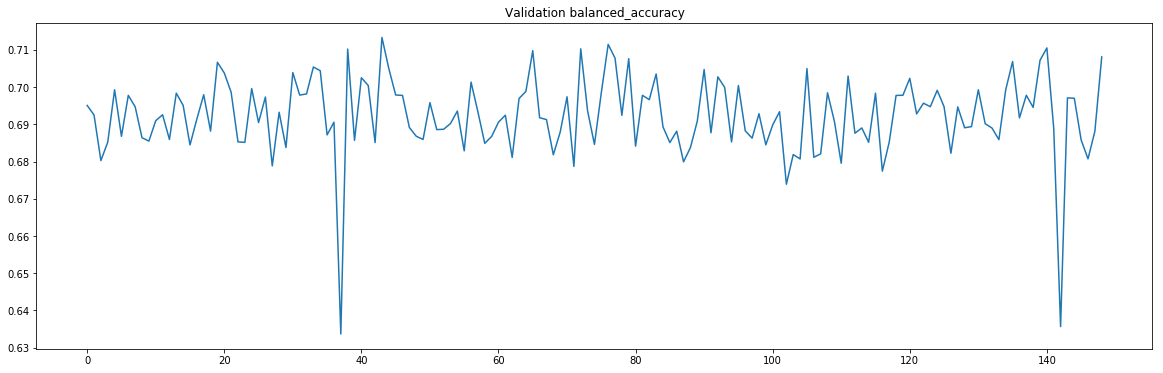

In [117]:
val_acc = [result[i]["val"]["balanced_accuracy"].values[0] for i in result]
test_acc = [result[i]["test"]["balanced_accuracy"].values[0] for i in result]
plt.figure(figsize=(20, 6))
plt.title('Validation balanced_accuracy')
plt.plot(val_acc)

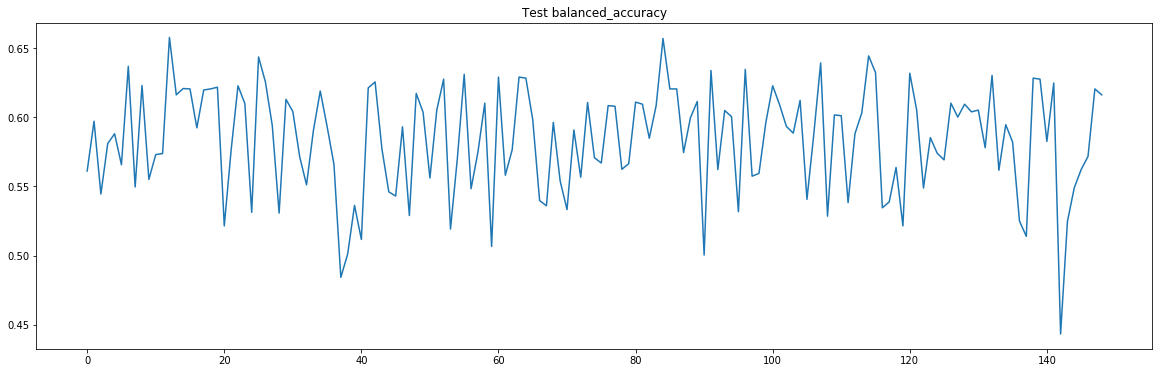

In [118]:
plt.figure(figsize=(20, 6))
plt.title('Test balanced_accuracy')
plt.plot(test_acc)

## Comparision to the tanimoto kernel(Gene expression only embedding)  
https://arxiv.org/pdf/2007.05943.pdf

In [55]:
ge_emb_train = pd.read_csv("ten_genes/train/property_vector_beforekpca_p=1,T=2_notnormalized_2021-03-17.csv", sep="\t")

In [56]:
ge_emb_test = pd.read_csv("ten_genes/test/property_vector_beforekpca_p=1,T=2_notnormalized_2021-03-17.csv", sep="\t")

In [58]:
emb_train = do_kpca(ge_emb_train, tan_dist=True)
emb_test = do_kpca(ge_emb_test, test_data=True, vector_space=ge_emb_train, tan_dist=True)

--- Doing KPCA
--- Doing KPCA
Train data:(448, 11), Test data:(193, 11)
--- Test data : (193, 448)


In [83]:
emb_train_tansim = do_kpca(ge_emb_train, n_components=150)
emb_test_tansim = do_kpca(ge_emb_test, test_data=True, vector_space=ge_emb_train, n_components=150)

--- Doing KPCA
--- Doing KPCA
Train data:(448, 11), Test data:(193, 11)
--- Test data : (193, 448)


In [64]:
emb_train.head()

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,patient_ID
0,0.524359,0.003303,0.166000,-0.166588,-0.153685,-0.251203,-0.113209,-0.160941,-0.163054,0.053065,...,-0.004027,-0.001811,-0.002429,-0.000390,0.000175,0.000029,0.000317,0.000017,1.256823e-08,305152
1,0.537904,-0.034996,0.311957,-0.010739,-0.147940,-0.262129,-0.068241,-0.094073,-0.011138,0.031075,...,-0.006321,0.005974,0.086551,-0.004610,-0.002503,-0.000325,-0.000208,-0.000089,2.275520e-05,305155
2,0.473984,-0.100300,0.123702,-0.205205,-0.107172,-0.227117,0.115733,0.148148,-0.018437,-0.005260,...,-0.004412,0.002853,-0.007010,0.001094,0.000236,-0.000043,0.000153,-0.000028,-8.814918e-06,305156
3,0.565211,0.041716,0.125334,0.098134,-0.080413,0.195153,-0.301598,0.078389,-0.065486,0.023819,...,-0.005037,0.024053,0.001199,-0.001905,0.000044,-0.000018,0.000156,0.000076,-1.595097e-04,305158
4,0.436199,-0.050551,-0.117170,-0.183122,0.232148,0.215847,-0.052430,0.193334,-0.120220,-0.026586,...,-0.004037,0.005362,0.000309,0.000623,-0.000334,-0.000036,0.000751,-0.000016,-3.830675e-06,305167


In [61]:
emb_test.shape

(193, 448)

Text(0.5, 1.0, 'Test embedding using training data as vector space (tanimoto kernel)')

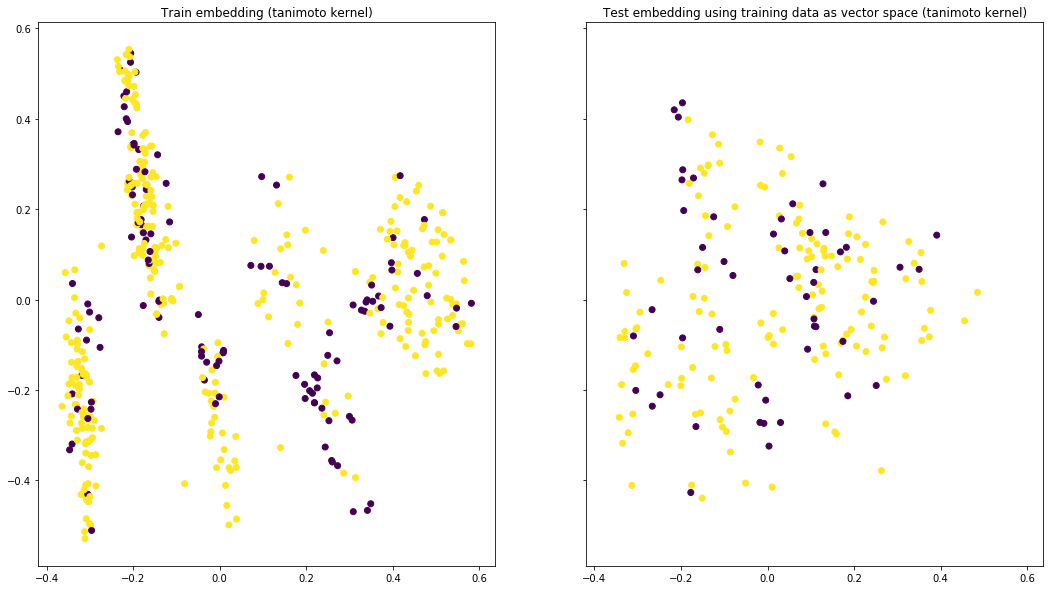

In [127]:
train_emb_plot = pd.merge(emb_train, outcome[outcome["patient_ID"].isin(emb_train["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test, outcome[outcome["patient_ID"].isin(emb_test["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding (tanimoto kernel)')
ax2.set_title('Test embedding using training data as vector space (tanimoto kernel)')

Text(0.5, 1.0, 'Test embedding using training data as vector space (tanimoto similarity)')

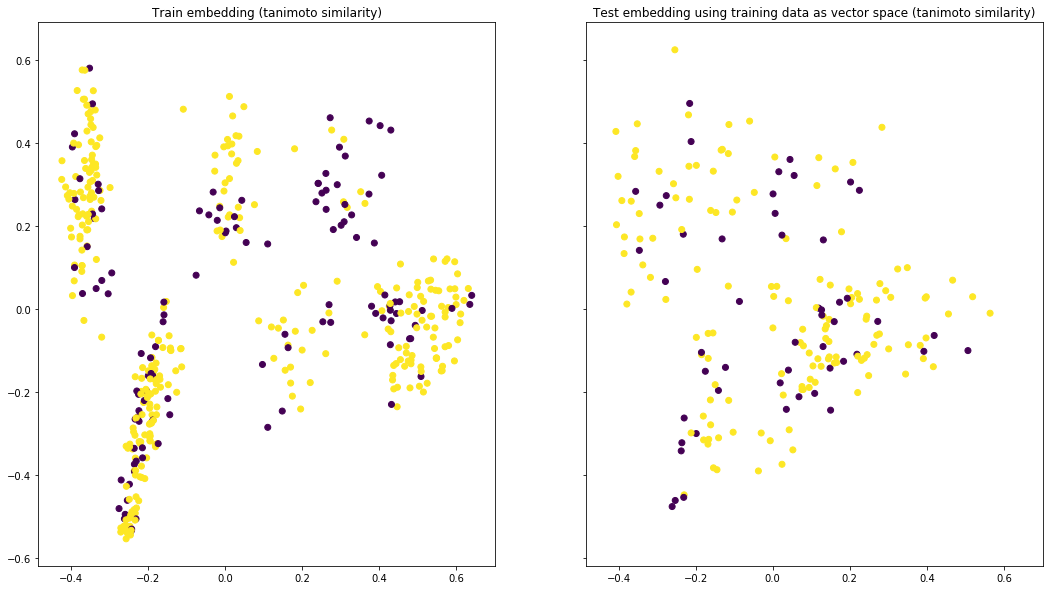

In [128]:
train_emb_plot = pd.merge(emb_train_tansim, outcome[outcome["patient_ID"].isin(emb_train_tansim["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test_tansim, outcome[outcome["patient_ID"].isin(emb_test_tansim["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding (tanimoto similarity)')
ax2.set_title('Test embedding using training data as vector space (tanimoto similarity)')

In [65]:
emb_all = pd.merge(emb_train.append(emb_test), outcome, on="patient_ID")
emb_all = emb_all.dropna()

In [66]:
val_res, test_res = do_train_val_test(emb_all.set_index("patient_ID").astype("float64"),scoring="balanced_accuracy", scale_pos_weight=True, train=train_set,test=test_set)

---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   32.3s finished



 Time taken: 0 hours 0 minutes and 35.72 seconds.
Best Score: 68.427%
{'n_estimators': 300, 'scale_pos_weight': 0.36, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


--- Validation score
balanced_accuracy    0.684266
recall_0             0.566667
precision_0          0.508884
recall_1             0.801865
precision_1          0.835971
auc                  0.753219
dtype: float64
tn: 22, fp:29, fn:44, tp:98
[[22 29]
 [44 98]]
--- Test score
balanced_accuracy      0.560757
recall_0               0.431373
precision_0            0.333333
recall_1               0.690141
precision_1            0.771654
auc                    0.565590
False_positive_rate    0.568627
False_negative_rate    0.309859
dtype: float64


In [67]:
val_res33, test_res33 = do_train_val_test(emb_all.set_index("patient_ID").astype("float64"),scoring="balanced_accuracy", dim=33, scale_pos_weight=True, train=train_set,test=test_set)

---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.3s finished



 Time taken: 0 hours 0 minutes and 3.92 seconds.
Best Score: 72.103%
{'n_estimators': 400, 'scale_pos_weight': 0.36, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.721031
recall_0             0.625000
precision_0          0.547929
recall_1             0.817063
precision_1          0.858630
auc                  0.766841
dtype: float64
tn: 22, fp:29, fn:59, tp:83
[[22 29]
 [59 83]]
--- Test score
balanced_accuracy      0.507940
recall_0               0.431373
precision_0            0.271605
recall_1               0.584507
precision_1            0.741071
auc                    0.545153
False_positive_rate    0.568627
False_negative_rate    0.415493
dtype: float64


In [86]:
emb_all_tansim = pd.merge(emb_train_tansim.append(emb_test_tansim), outcome, on="patient_ID")
emb_all_tansim = emb_all_tansim.dropna()
val_res_tansim33, test_res_tansim33 = do_train_val_test(emb_all_tansim.set_index("patient_ID").astype("float64"),dim=33,scoring="balanced_accuracy", scale_pos_weight=True, train=train_set,test=test_set)

---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.3s finished



 Time taken: 0 hours 0 minutes and 3.96 seconds.
Best Score: 70.948%
{'n_estimators': 700, 'scale_pos_weight': 0.36, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 5, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.709481
recall_0             0.608333
precision_0          0.540441
recall_1             0.810629
precision_1          0.850314
auc                  0.752756
dtype: float64
tn: 22, fp:29, fn:33, tp:109
[[ 22  29]
 [ 33 109]]
--- Test score
balanced_accuracy      0.599489
recall_0               0.431373
precision_0            0.400000
recall_1               0.767606
precision_1            0.789855
auc                    0.547915
False_positive_rate    0.568627
False_negative_rate    0.232394
dtype: float64


In [124]:
print_comparision({"all_dim_tanKernel":val_res, "dim33_tanKernel":val_res33,"dim33_tansim":val_res_tansim33 })

,all_dim_tanKernel,dim33_tanKernel,dim33_tansim
auc,0.753219,0.766841,0.752756
balanced_accuracy,0.684266,0.721031,0.709481
precision_0,0.508884,0.547929,0.540441
precision_1,0.835971,0.85863,0.850314
recall_0,0.566667,0.625,0.608333
recall_1,0.801865,0.817063,0.810629


In [125]:
print_comparision({"all_dim_tanKernel":test_res, "dim33_tanKernel":test_res33, "dim33 tansim":test_res_tansim33})

,all_dim_tanKernel,dim33_tanKernel,dim33 tansim
False_negative_rate,0.309859,0.415493,0.232394
False_positive_rate,0.568627,0.568627,0.568627
auc,0.56559,0.545153,0.547915
balanced_accuracy,0.560757,0.50794,0.599489
precision_0,0.333333,0.271605,0.4
precision_1,0.771654,0.741071,0.789855
recall_0,0.431373,0.431373,0.431373
recall_1,0.690141,0.584507,0.767606
